# Micro Credit Loan Defaulter Project

### Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients. We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

> Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

Points to Remember:
- There are no null values in the dataset. 
- There may be some customers with no loan history. 
- The dataset is imbalanced. Label ‘1’ has approximately 87.5 percent records, while, label ‘0’ has approximately 12.5 percent records.
- For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
- You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8 percent of the total data.  

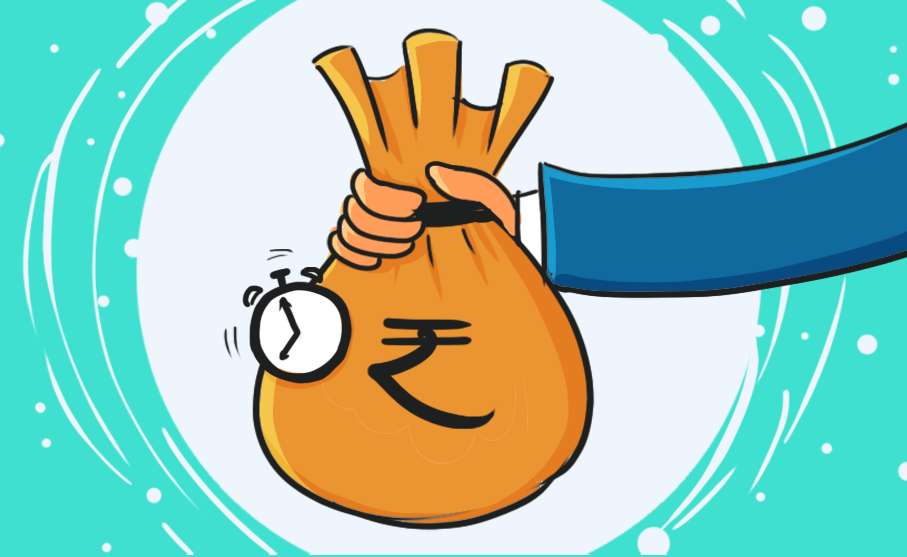

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#path = '/content/drive/MyDrive/Data Science/Data file.csv'

In [5]:
#Read the csv file
df = pd.read_csv('Data file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [6]:
#Shape of the dataset
df.shape

(209593, 37)

In [7]:
#columns names
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [8]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Using the info method we are able to confirm the non null count details as well as the datatype information. We have 21 float/decimal datatype, 12 integer datatype and 3 object/categorical datatype columns. We will need to convert the object datatype columns to numerical data before we input the information in our machine learning models.

In [9]:
#Datatype of dataset
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [10]:
#Statistical analysis of dataset
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

In [11]:
#Statistical analysis for object datatype
df.describe(include=['O'])

msisdn pcircle       pdate
count        209593  209593      209593
unique       186243       1          82
top     04581I85330     UPW  2016-07-04
freq              7  209593        3150

In [12]:
#check for missing values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [13]:
#plotting missing values in bar format
import missingno

<AxesSubplot:>

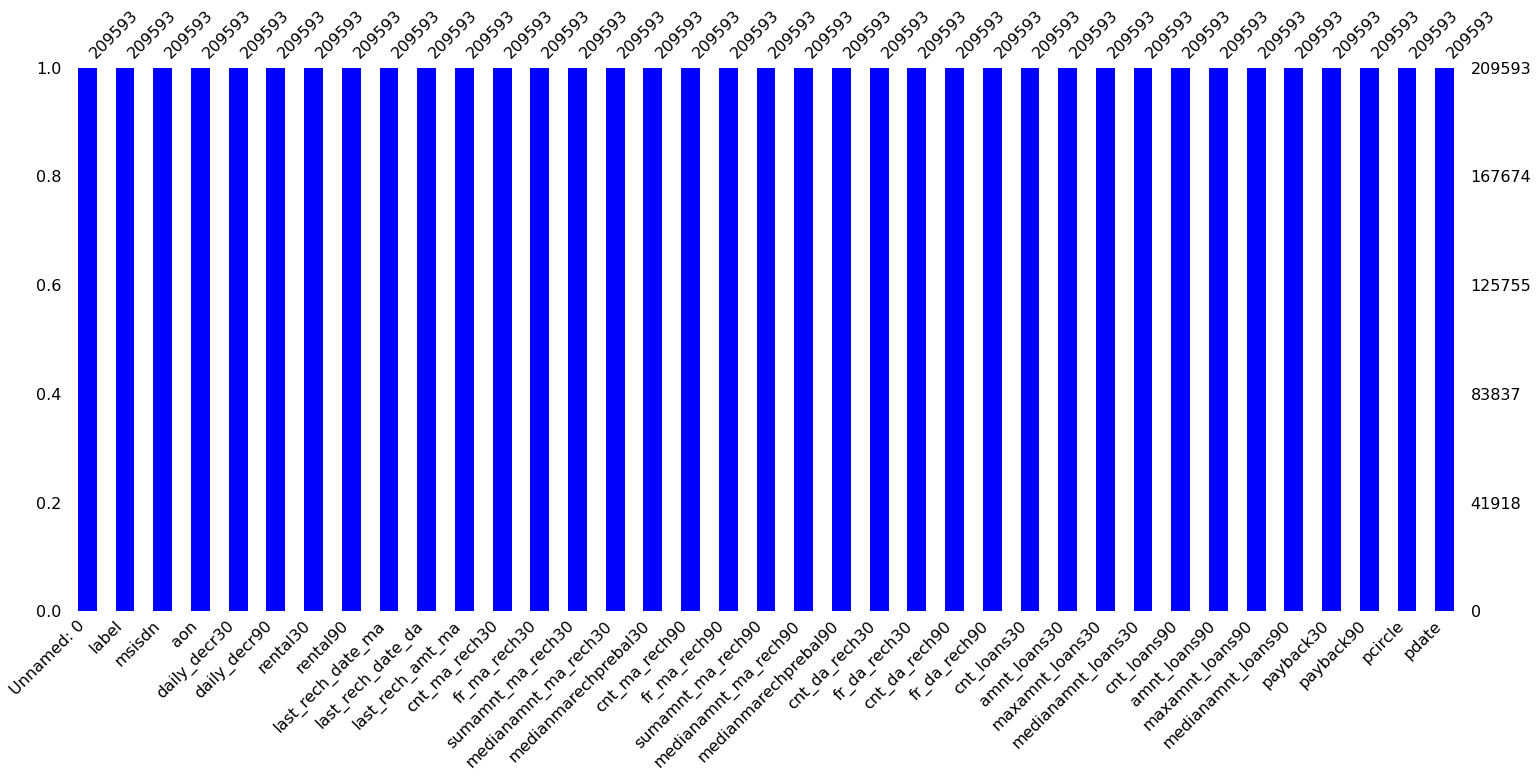

In [14]:
missingno.bar(df,color='blue')

In [15]:
#Dropping Unnamed: 0 from the dataset
df = df.drop(['Unnamed: 0'],axis=1)

df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 36 columns]

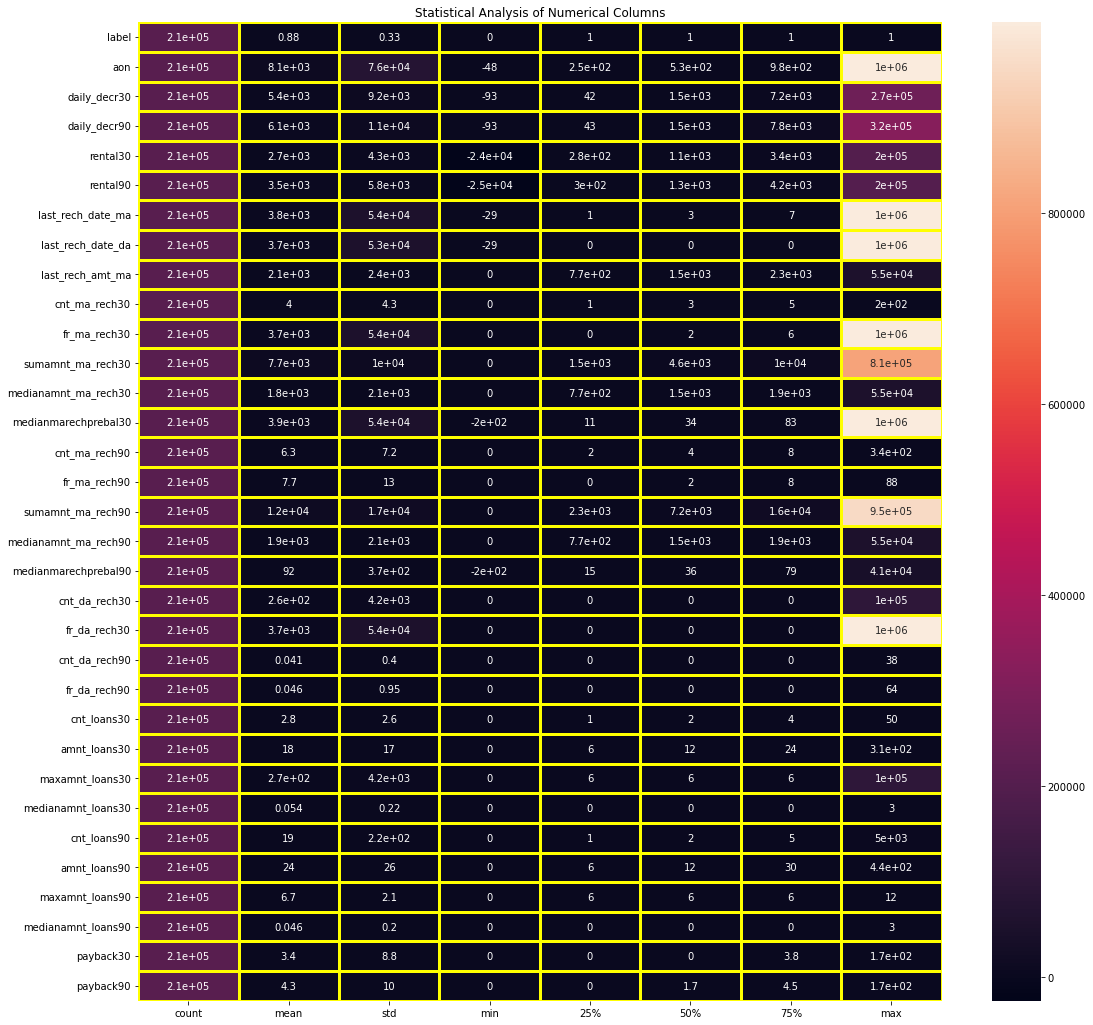

In [16]:
#visualizing the dataset
plt.figure(figsize=(18,18))
sns.heatmap(df.describe().T,annot=True,linecolor='yellow',linewidths=3)
plt.title('Statistical Analysis of Numerical Columns')
plt.show()

In the above report we can see that the maximum value for columns aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, fr_ma_rech30, sumamnt_ma_rech30, medianmarechprebal30, sumamnt_ma_rech90 and fr_da_rech30 have quite a high number than the other column values.

In [17]:
print("Number of Rows is {} and number of Columns is {} before dropping duplicates".format(df.shape[0], df.shape[1]))
df.drop_duplicates(inplace=True)
print("Number of Rows is {} and number of Columns is {} after dropping duplicates".format(df.shape[0], df.shape[1]))

Number of Rows is 209593 and number of Columns is 36 before dropping duplicates
Number of Rows is 209592 and number of Columns is 36 after dropping duplicates


There was only 1 duplicate record removed from our entire dataset.

# Data Preprocessing

In [18]:
df['pdate'] = pd.to_datetime(df['pdate']) # converting from object to datetime

df['Year']=df['pdate'].dt.year
df['Month']=df['pdate'].dt.month
df['Date']=df['pdate'].dt.day

print(df['Year'].value_counts())
print(df['Month'].value_counts())
print(df['Date'].value_counts())

2016    209592
Name: Year, dtype: int64
7    85764
6    83154
8    40674
Name: Month, dtype: int64
11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5815
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: Date, dtype: int64


In [19]:
df.drop(columns=['msisdn', 'pdate', 'Year'], axis=1, inplace=True)
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  ...  \
0                2.0                0.0              1539              2  ...   
1               20.0                0.0              5787              1  ...   
2                3.0                0.0              1539              1  ...   
3               41.0                0.0               947              0  ...   
4                4.0                0.0              2309              7  ...   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  pcircle  Month  Date  
0                 0.0  29.000000  29.000000      UPW      7    20  
1                 0.0   0.000000   0.000000      UPW      8    10  
2                 0.0   0.000000   0.000000      UPW      8    19  
3                 0.0   0.000000   0.000000      UPW      6     6  
4                 0.0   2.333333   2.333333      UPW      6    22  

[5 rows x 36 columns]

In [20]:
df.nunique().sort_values().to_frame('Unique Values')

Unique Values
pcircle                           1
label                             2
maxamnt_loans90                   3
Month                             3
medianamnt_loans90                6
medianamnt_loans30                6
cnt_da_rech90                    27
Date                             31
cnt_loans30                      40
fr_da_rech90                     46
amnt_loans30                     48
amnt_loans90                     69
last_rech_amt_ma                 70
cnt_ma_rech30                    71
fr_ma_rech90                     89
cnt_ma_rech90                   110
medianamnt_ma_rech30            510
medianamnt_ma_rech90            608
maxamnt_loans30                1050
cnt_da_rech30                  1066
fr_da_rech30                   1072
fr_ma_rech30                   1083
cnt_loans90                    1110
last_rech_date_da              1174
last_rech_date_ma              1186
payback30                      1363
payback90                      2381
aon                            4507
sumamnt_ma_rech30             15141
medianmarechprebal90          29785
medianmarechprebal30          30428
sumamnt_ma_rech90             31771
rental30                     132148
rental90                     141033
daily_decr30                 147025
daily_decr90                 158669

In the above list we can see that column pcircle has 1 single data value filled in all the records and therefore do not conribute much towards the output label generation.

In [21]:
df = df.drop(['pcircle'],axis=1)

df

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0       ...              6.0                 0.0          2.0            12   
1       ...             12.0                 0.0          1.0            12   
2       ...              6.0                 0.0          1.0             6   
3       ...              6.0                 0.0          2.0            12   
4       ...              6.0                 0.0          7.0            42   
...     ...              ...                 ...          ...           ...   
209588  ...              6.0                 0.0          2.0            12   
209589  ...              6.0                 0.0          3.0            18   
209590  ...             12.0                 0.0          6.0            54   
209591  ...             12.0                 0.0          3.0            24   
209592  ...             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  Month  Date  
0                     6                 0.0  29.000000  29.000000      7    20  
1                    12                 0.0   0.000000   0.000000      8    10  
2                     6                 0.0   0.000000   0.000000      8    19  
3                     6                 0.0   0.000000   0.000000      6     6  
4                     6                 0.0   2.333333   2.333333      6    22  
...                 ...                 ...        ...        ...    ...   ...  
209588                6                 0.0   1.000000   1.000000      6    17  
209589                6                 0.0   1.000000   1.000000      6    12  
209590               12                 0.0   4.000000   3.833333      7    29  
209591               12                 0.0   0.000000  10.500000      7    25  
209592               12                 0.0   0.000000   0.000000      7     7  

[209592 rows x 35 columns]

# Visualization

Distplot

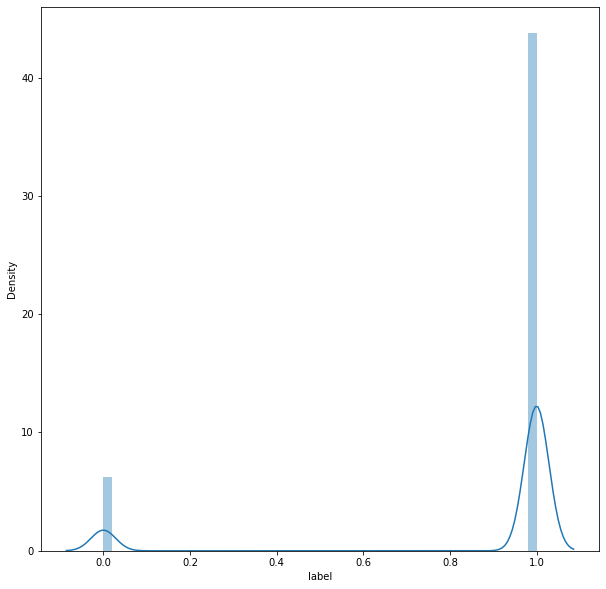

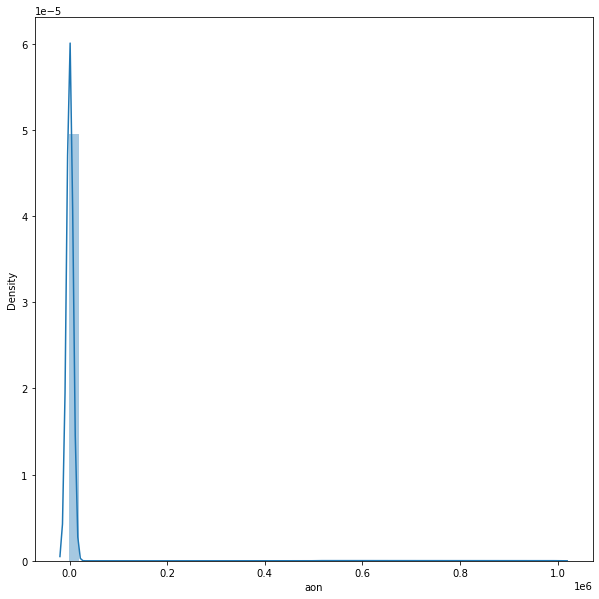

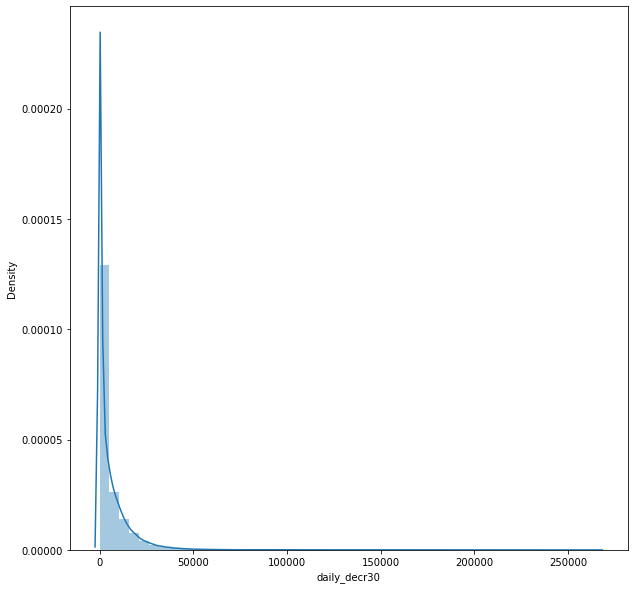

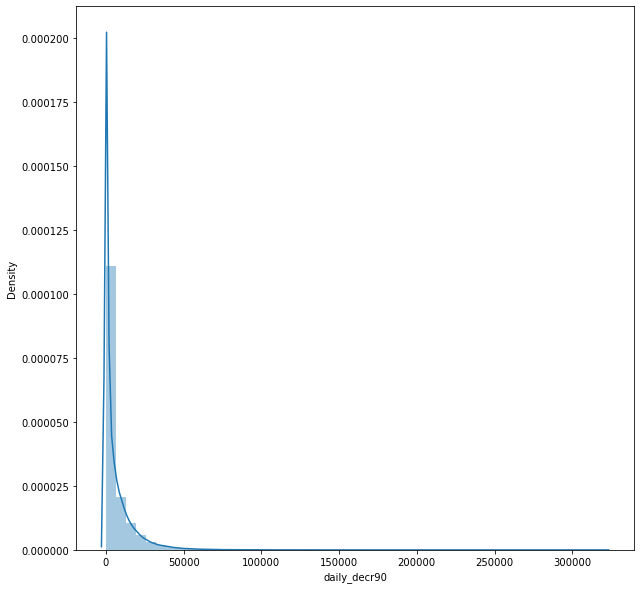

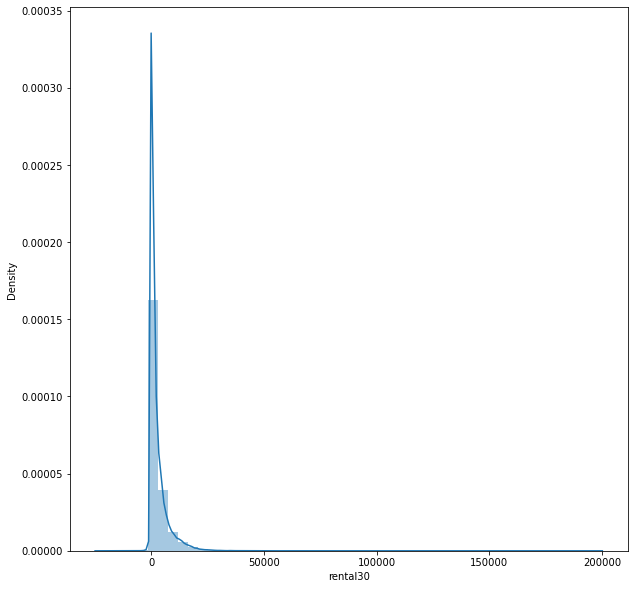

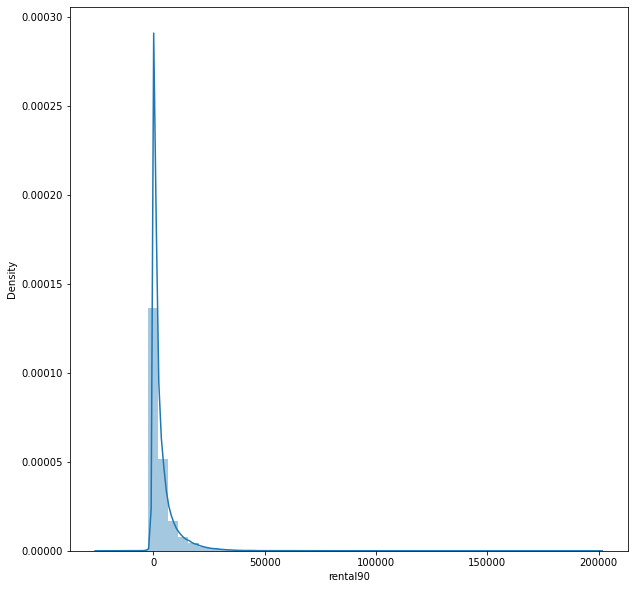

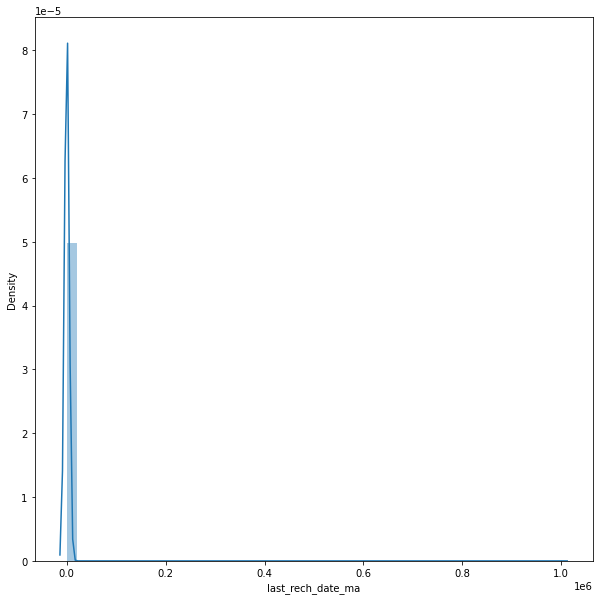

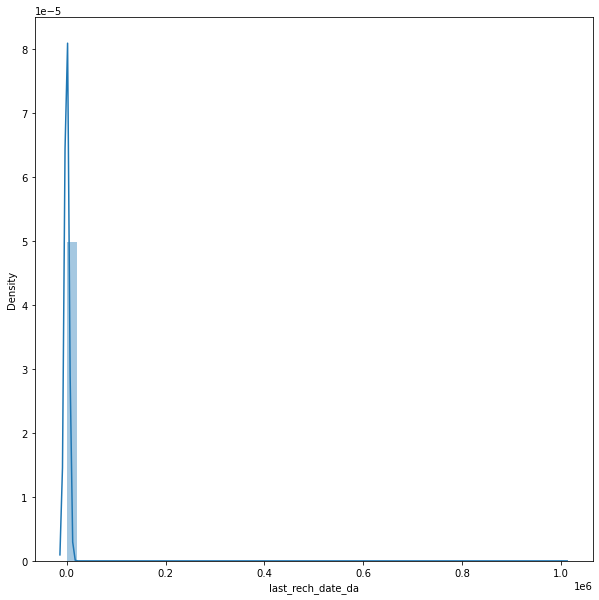

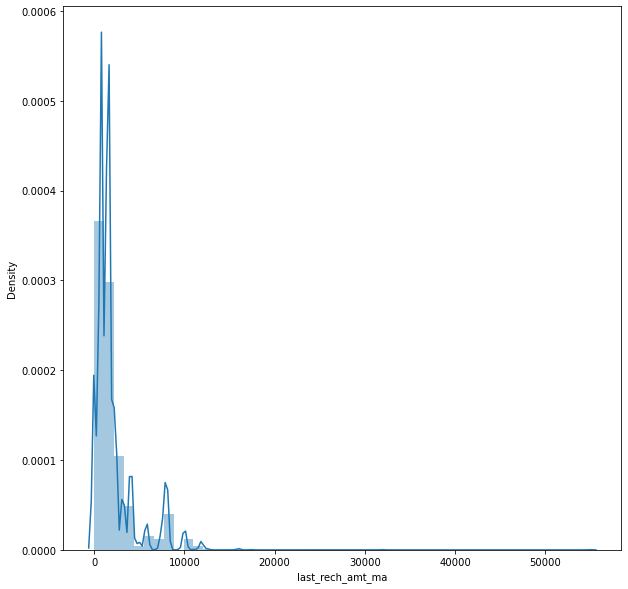

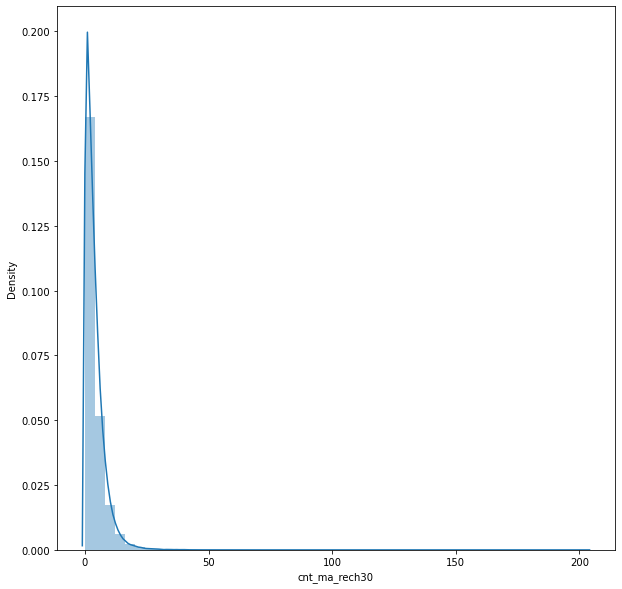

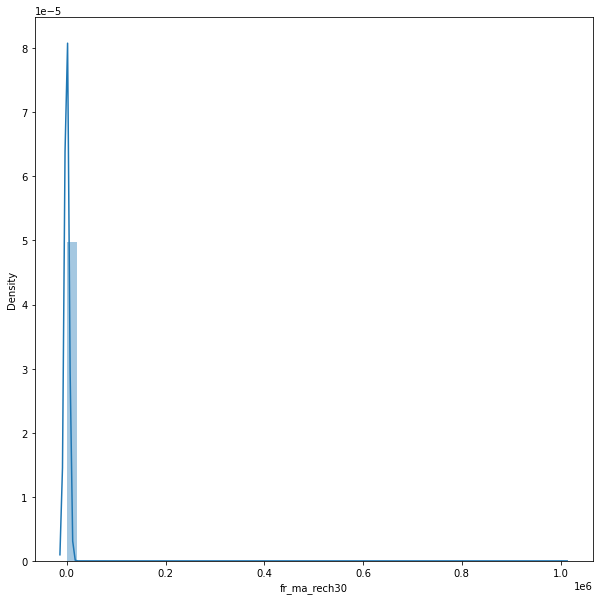

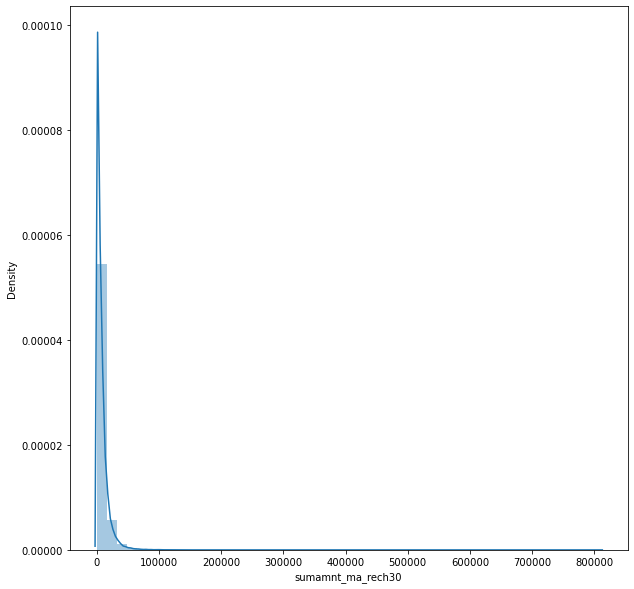

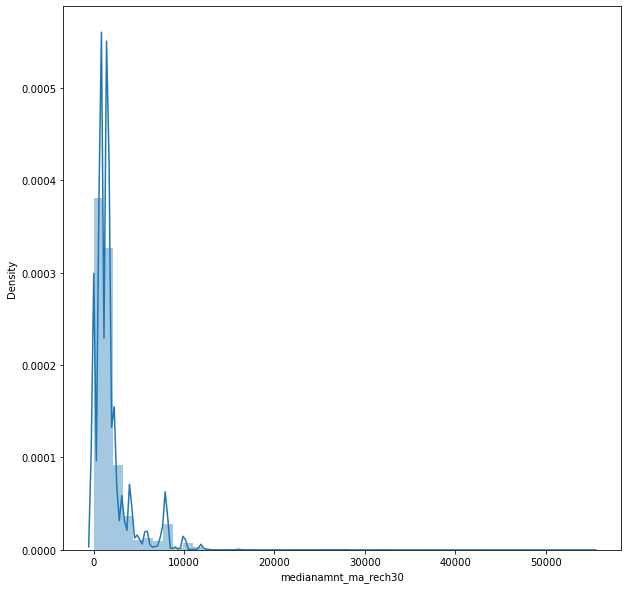

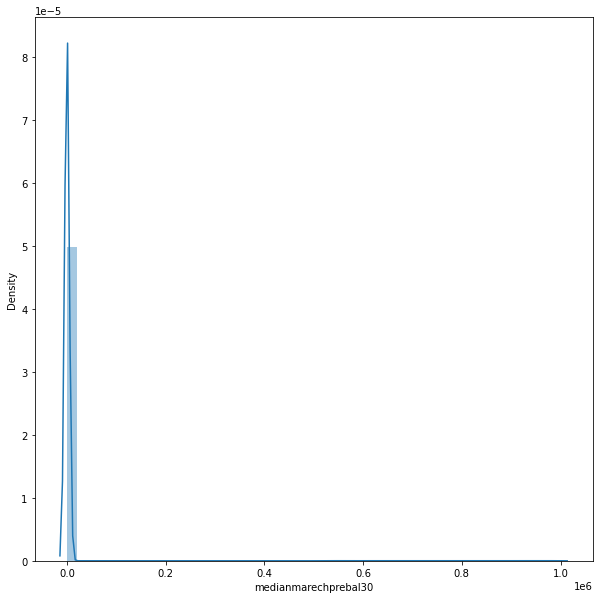

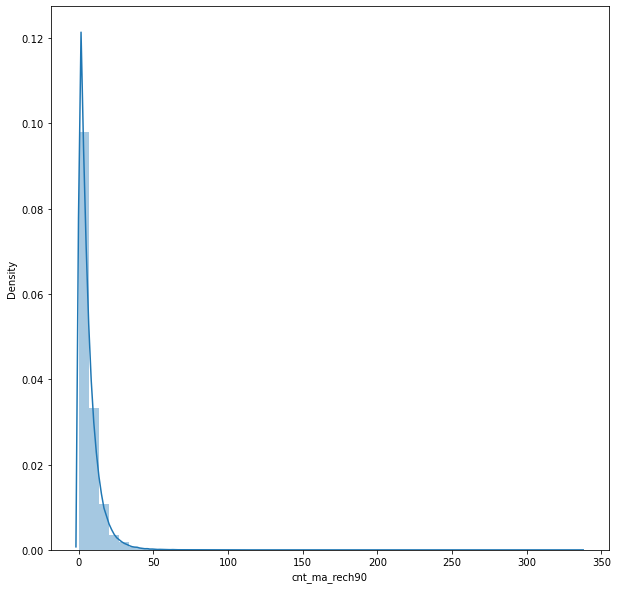

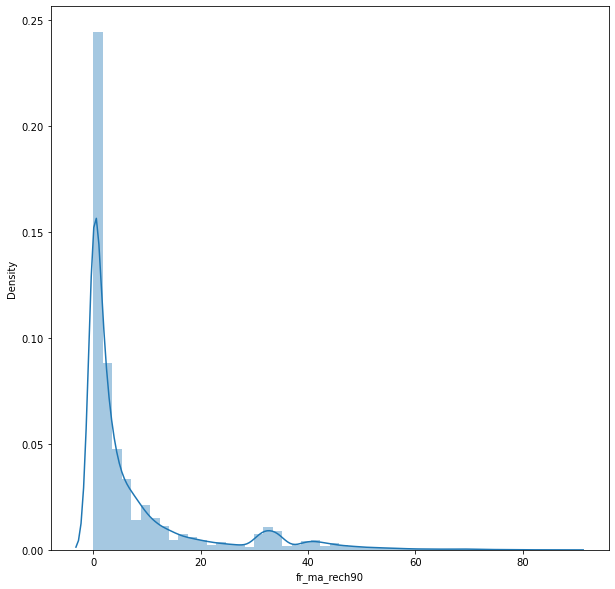

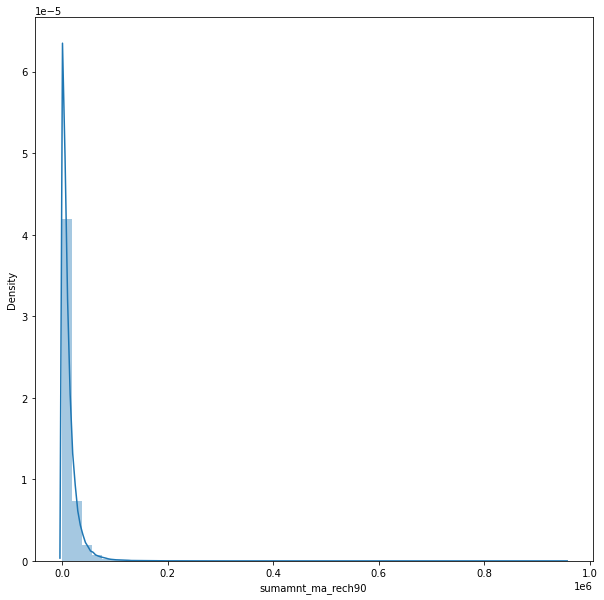

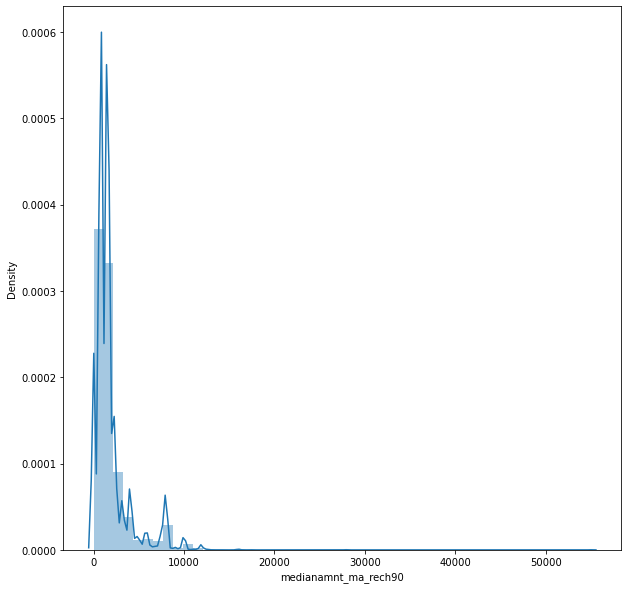

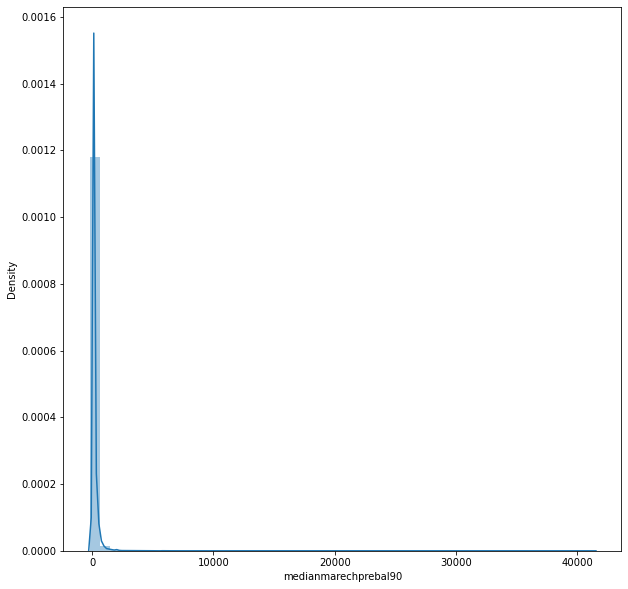

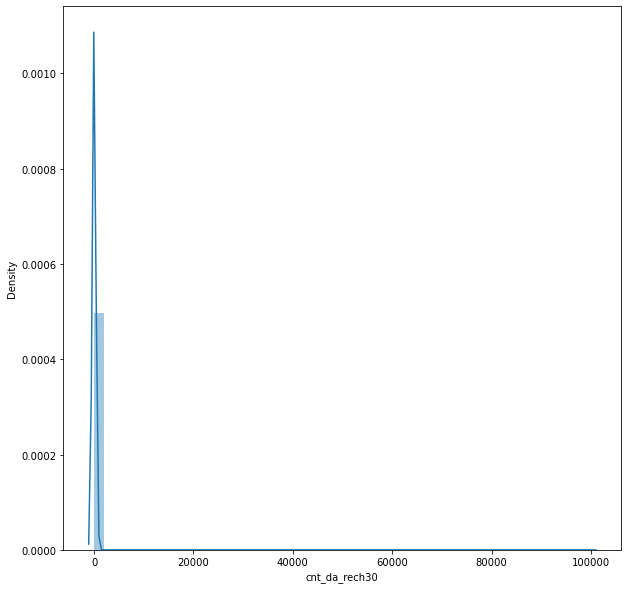

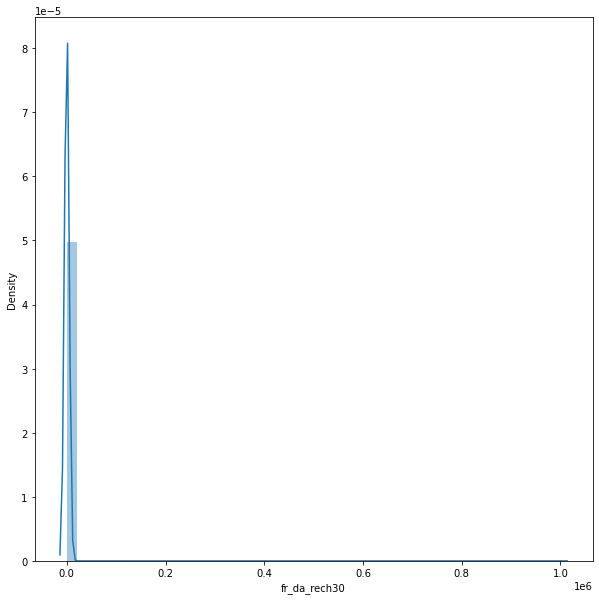

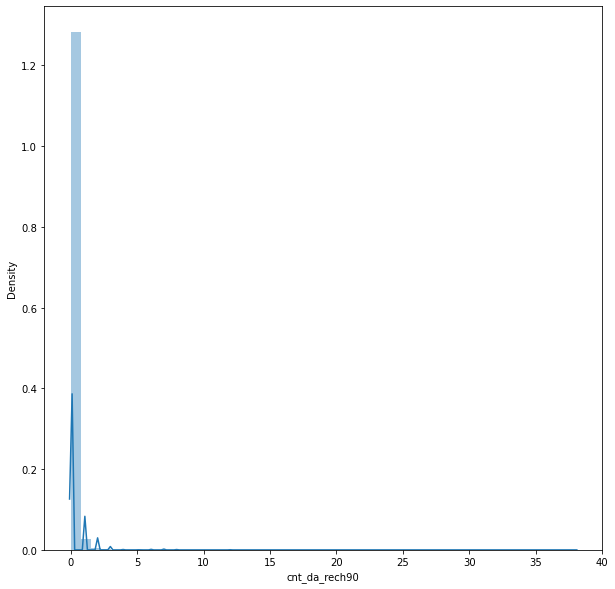

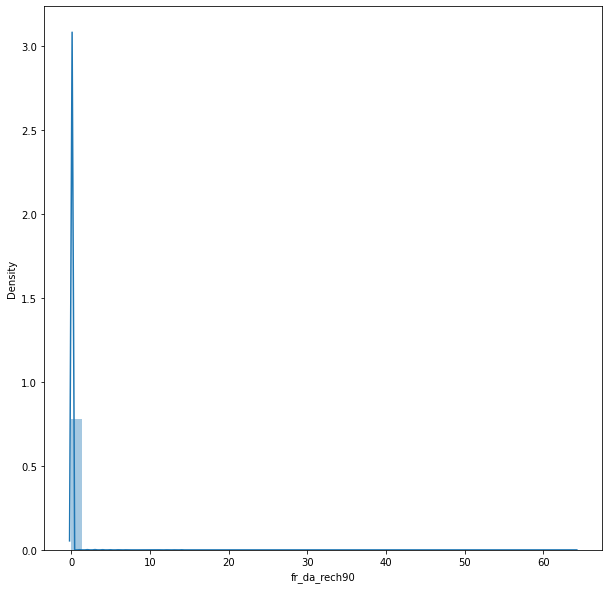

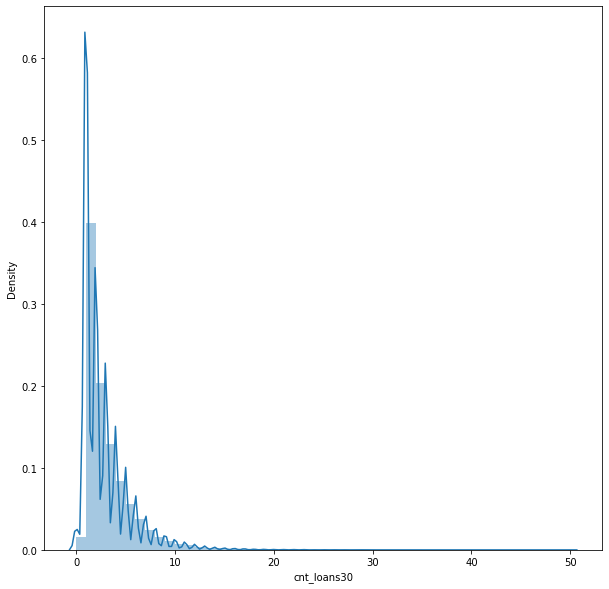

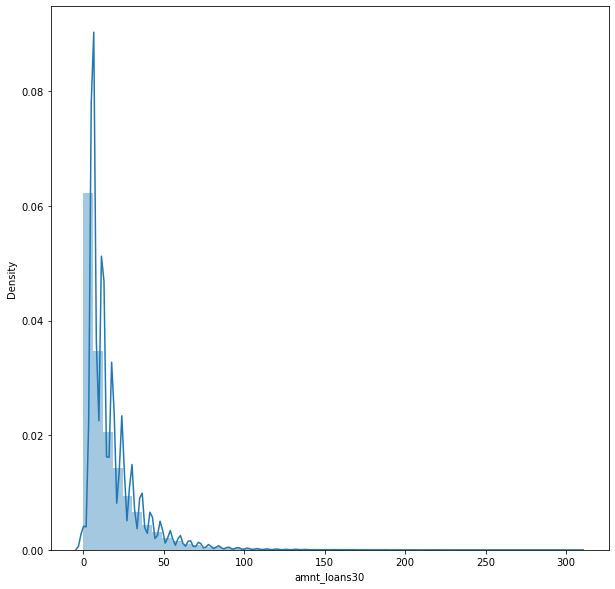

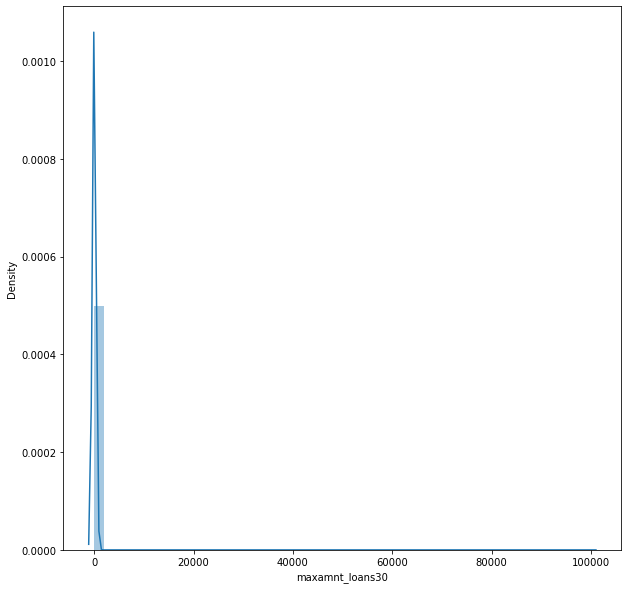

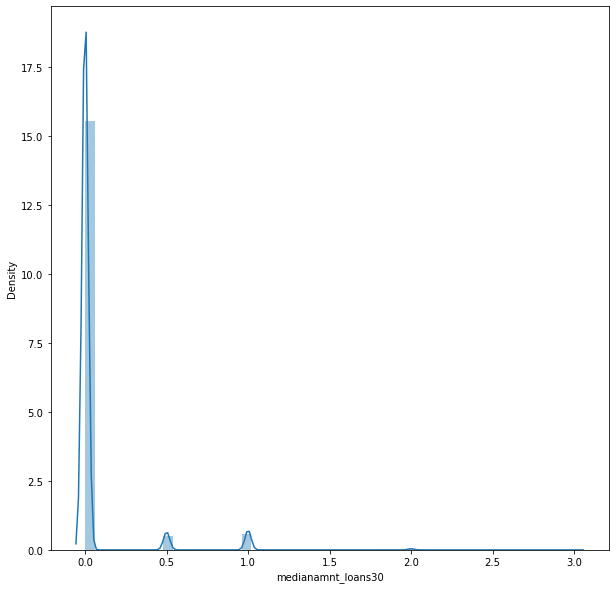

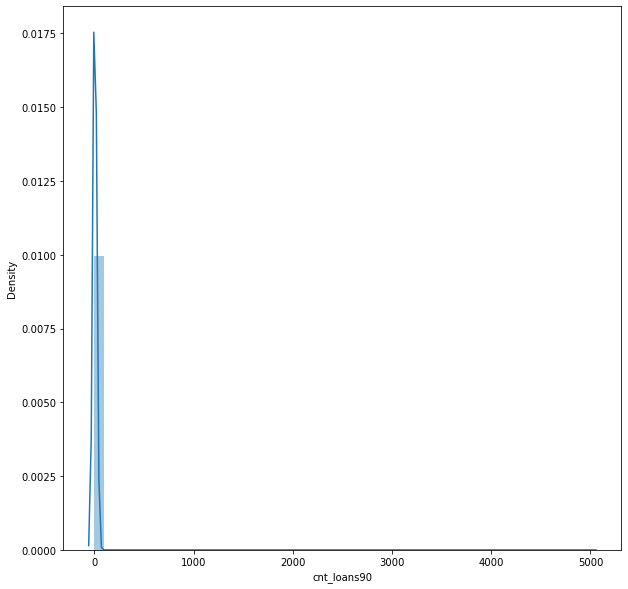

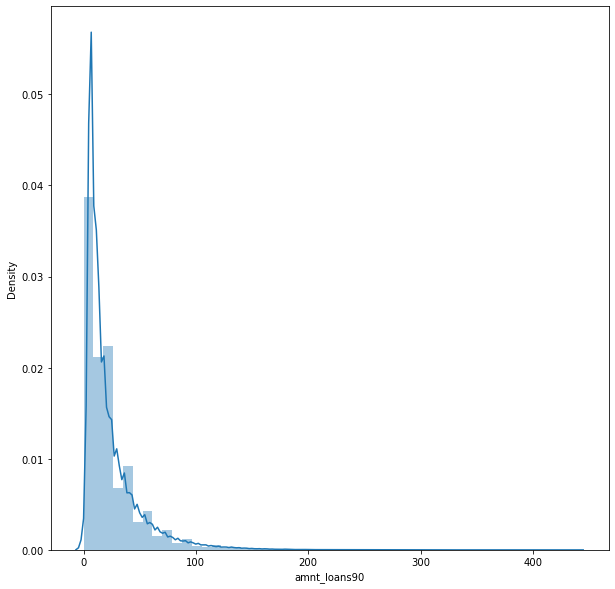

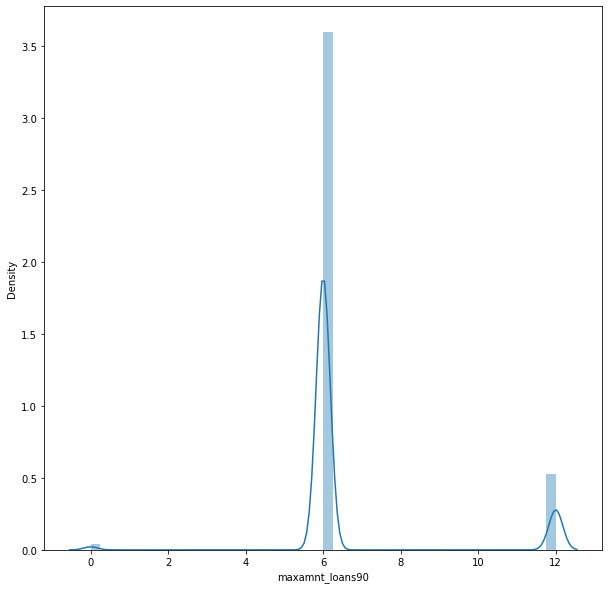

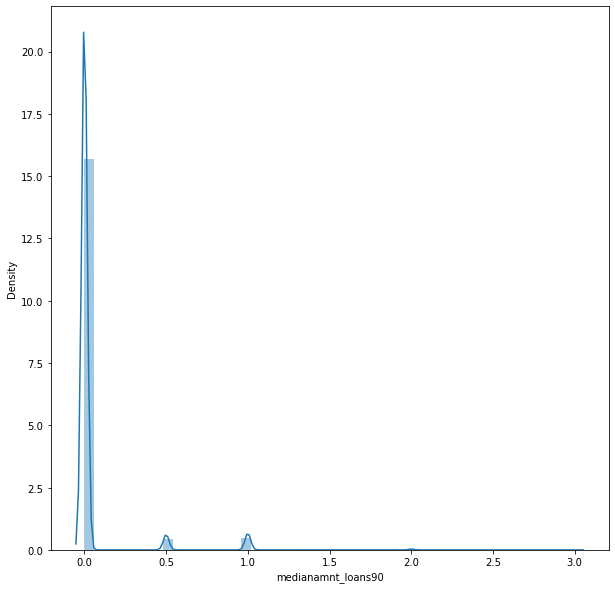

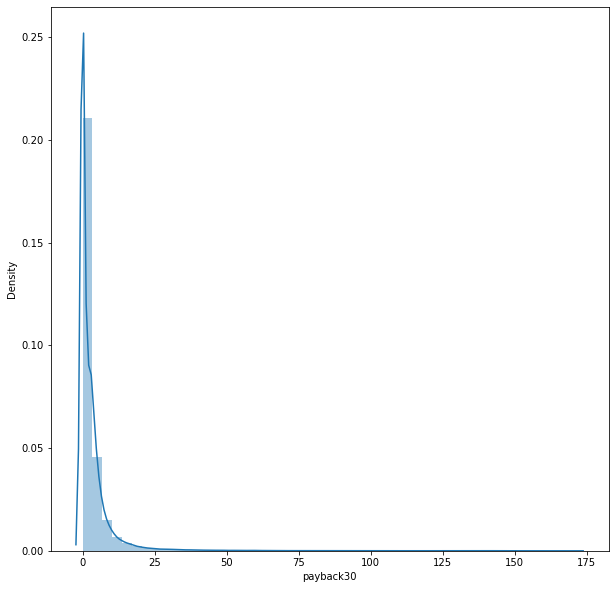

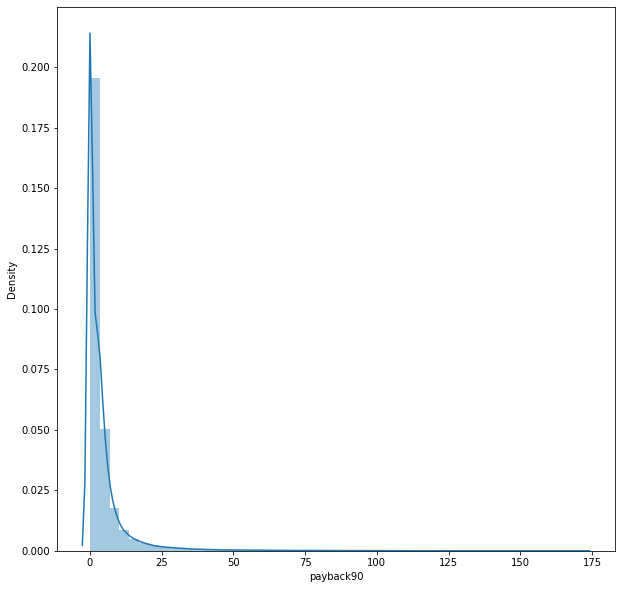

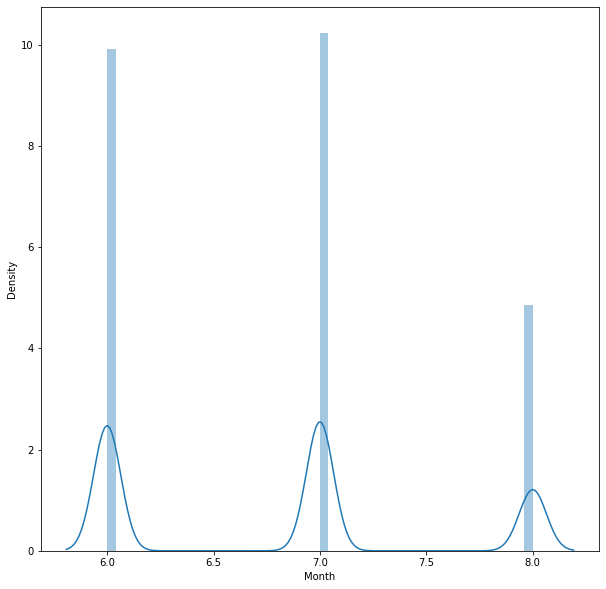

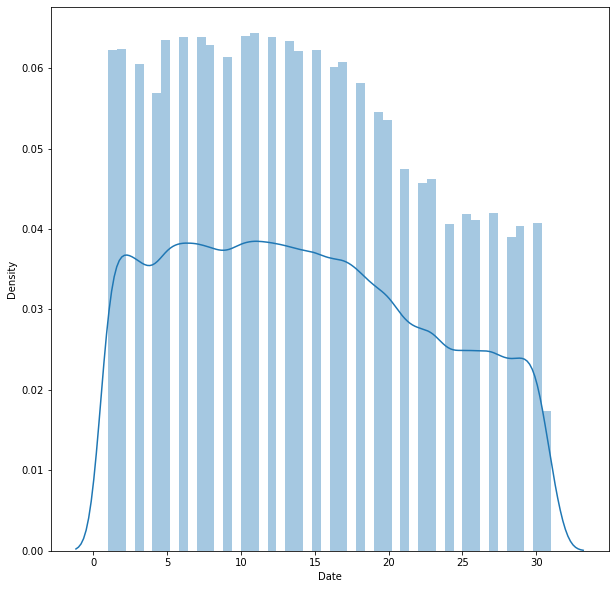

In [22]:
def distplot():
  for i in df:
    plt.figure(figsize=(10,10))
    a = sns.distplot(df[i])
distplot()

Histogram

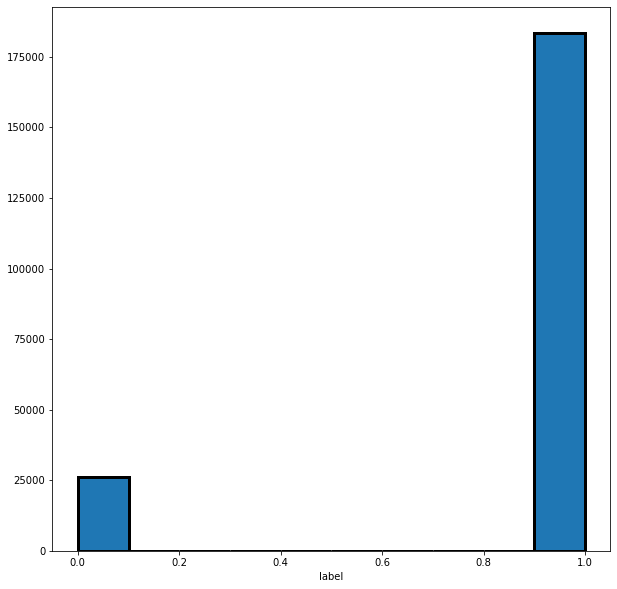

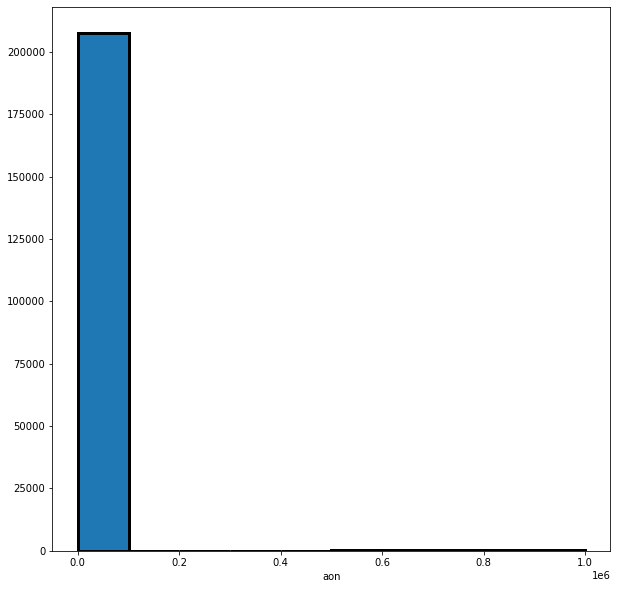

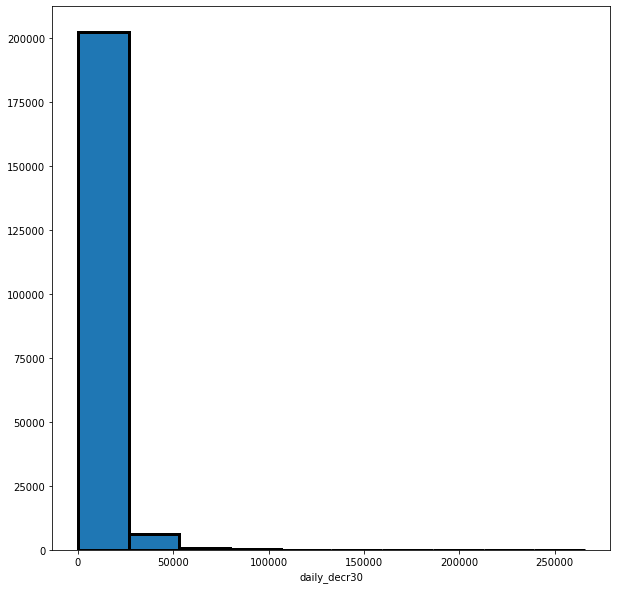

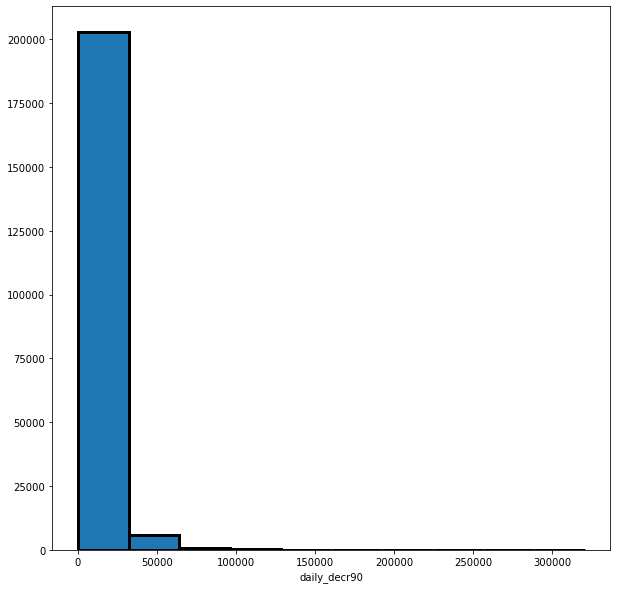

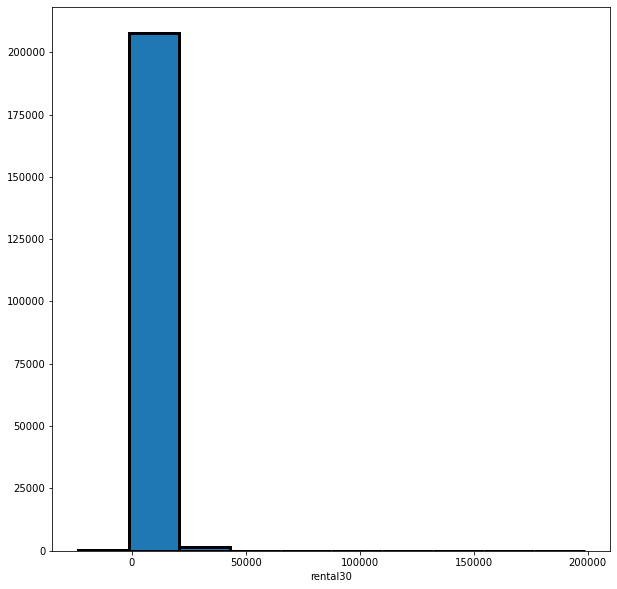

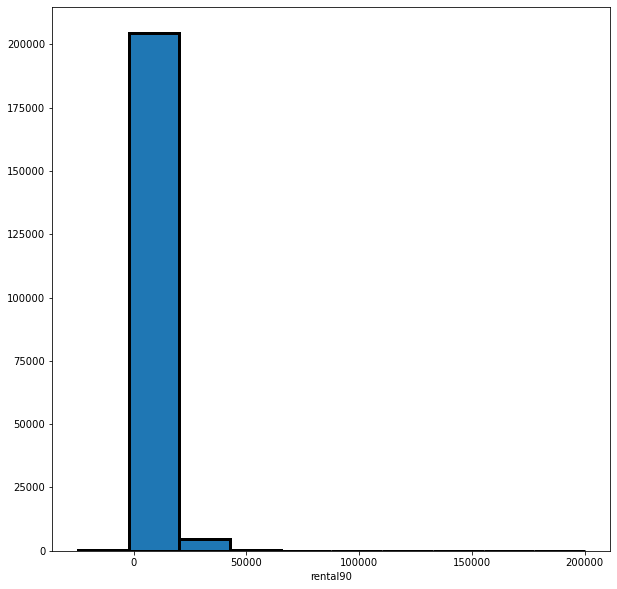

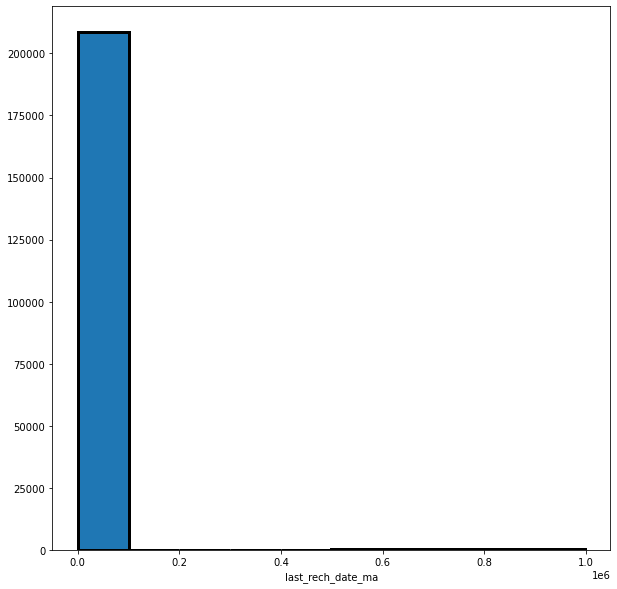

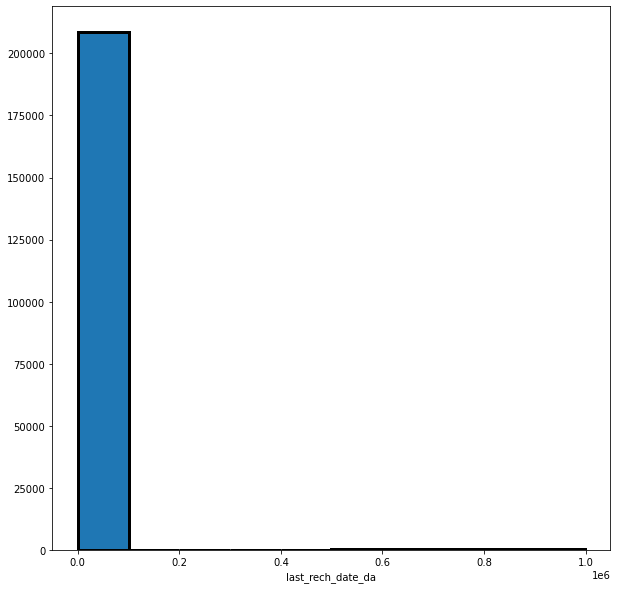

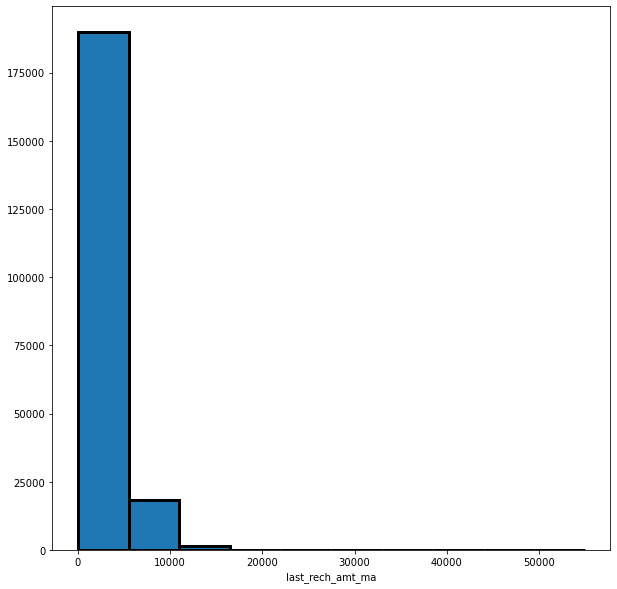

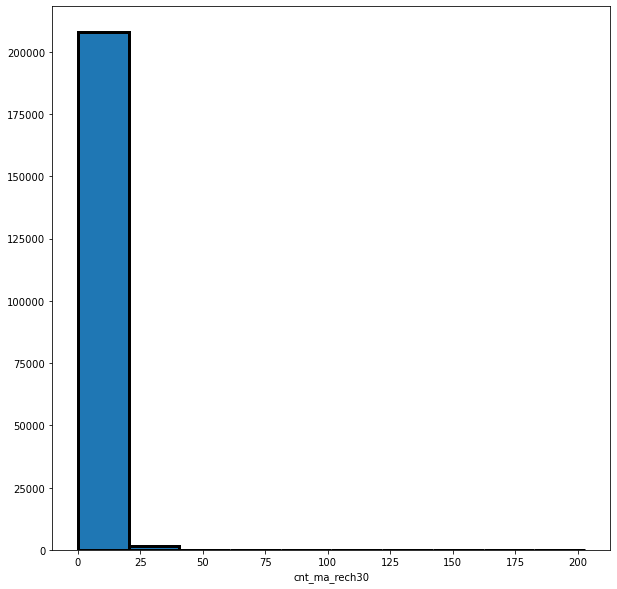

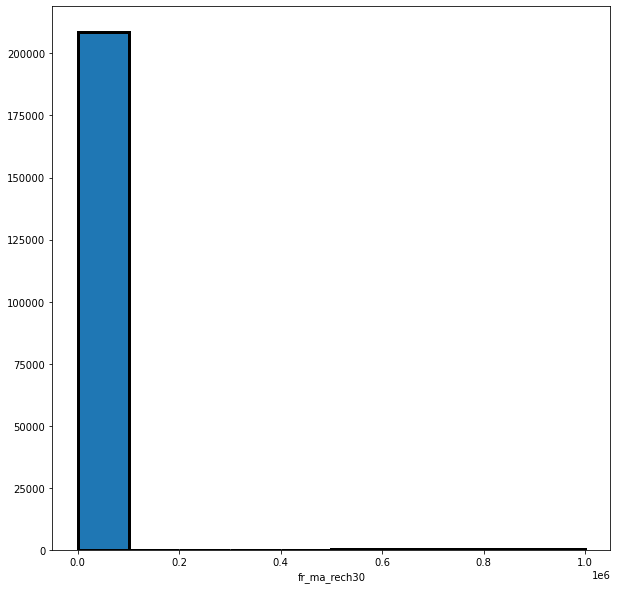

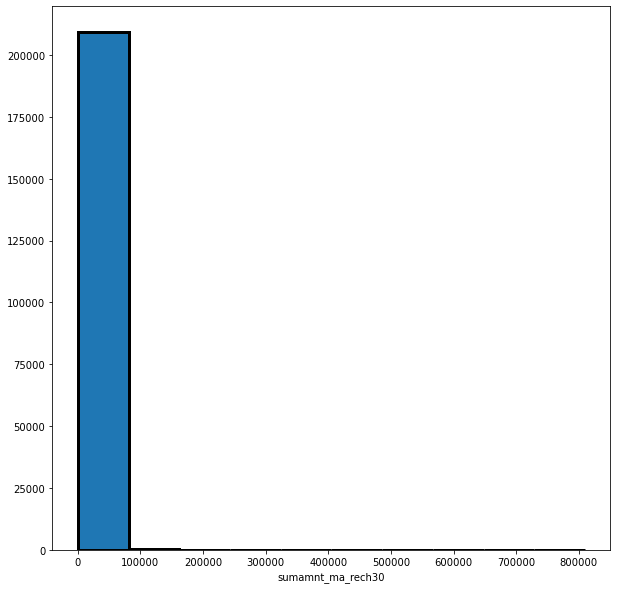

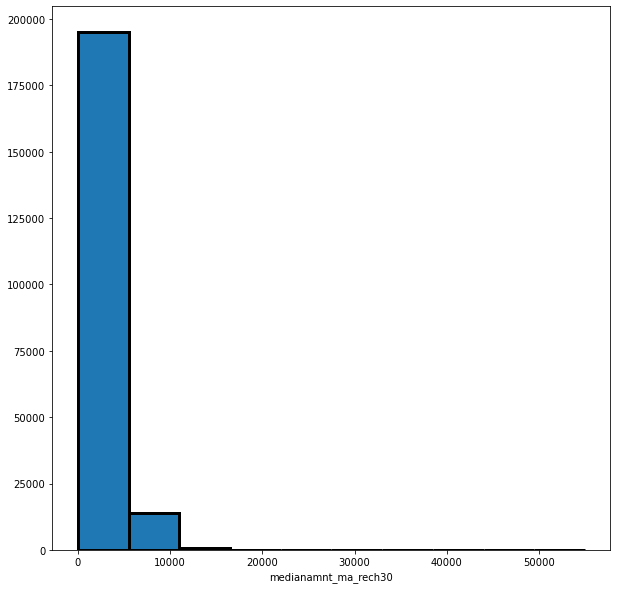

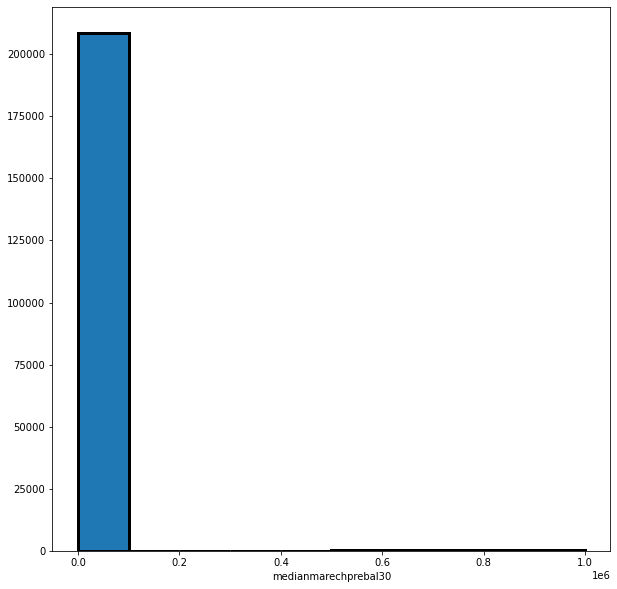

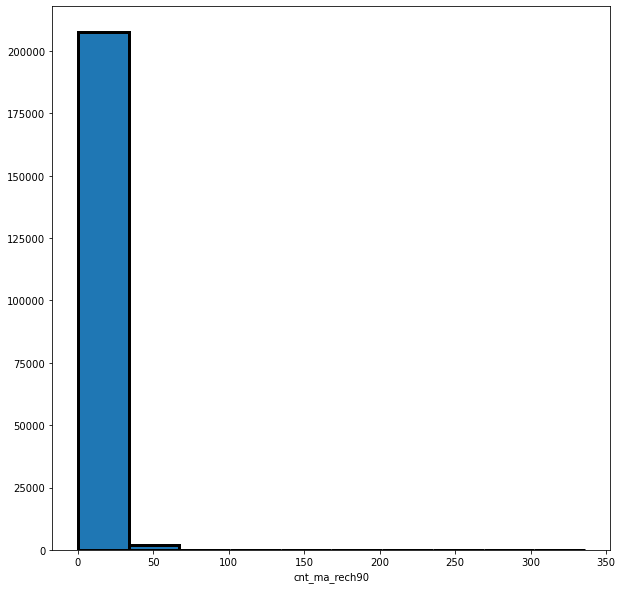

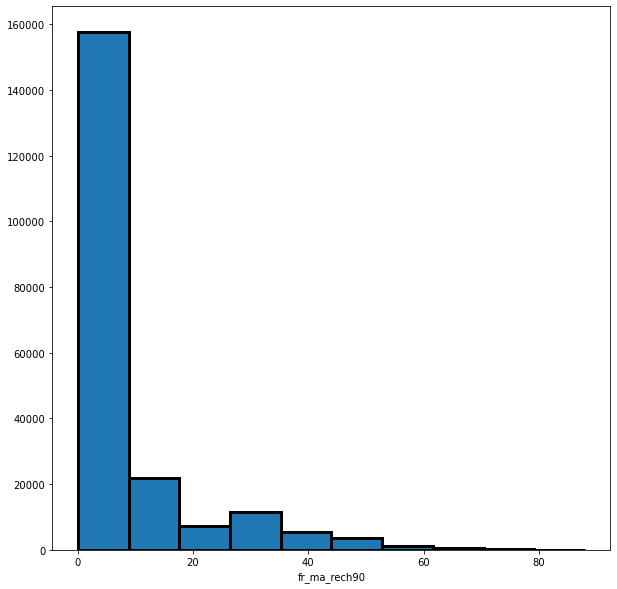

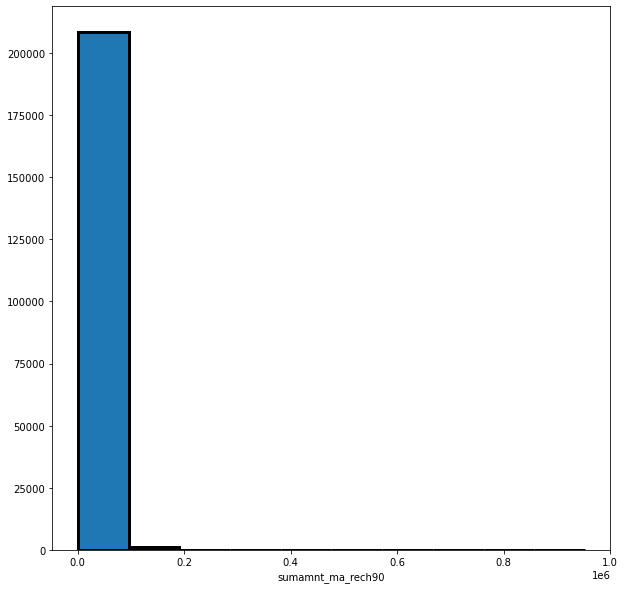

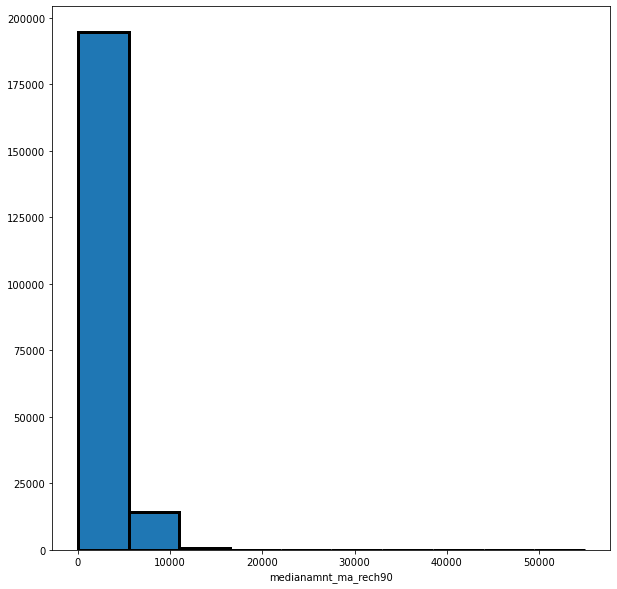

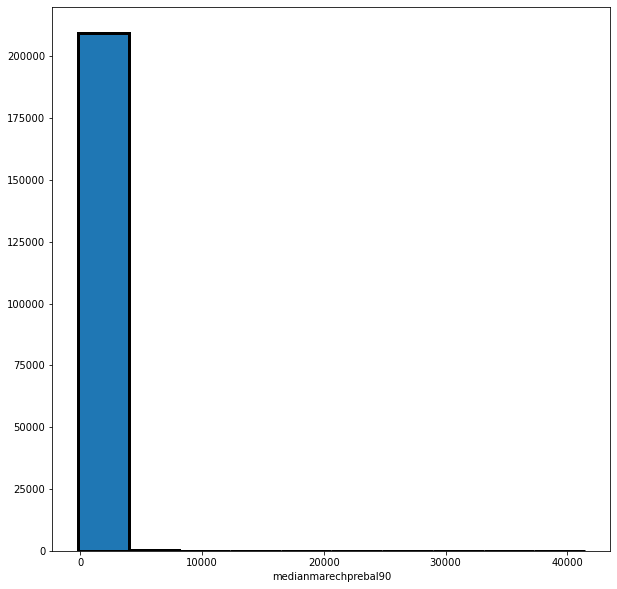

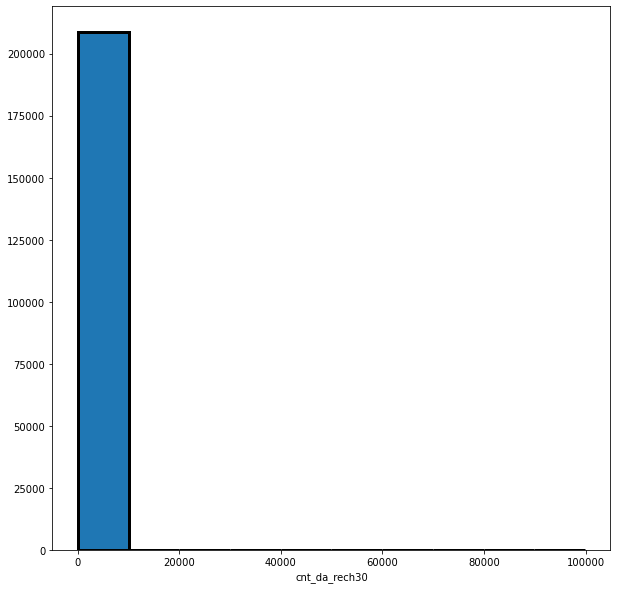

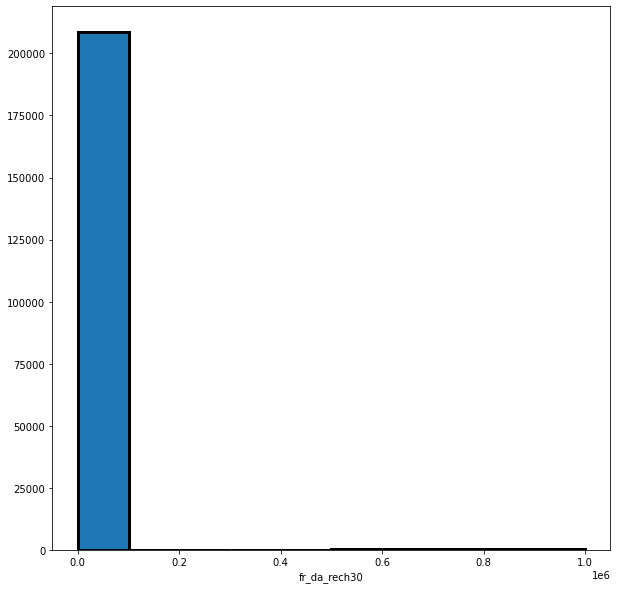

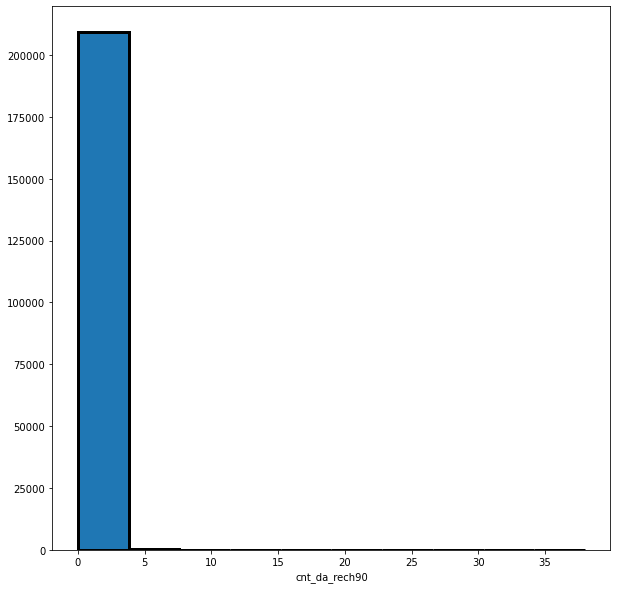

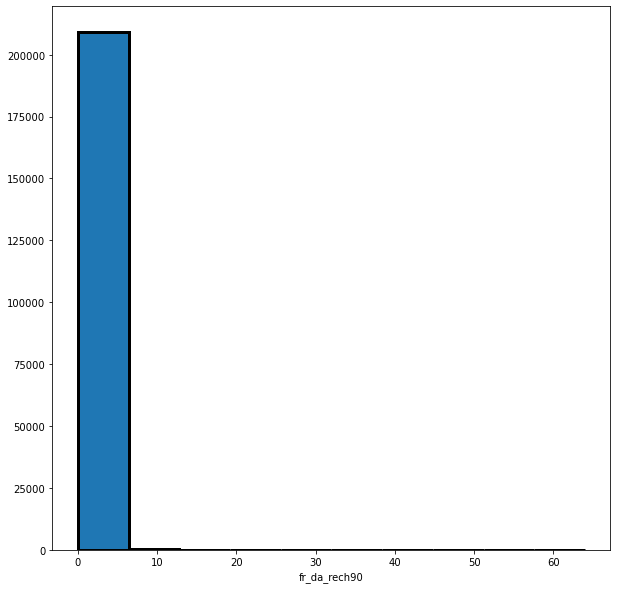

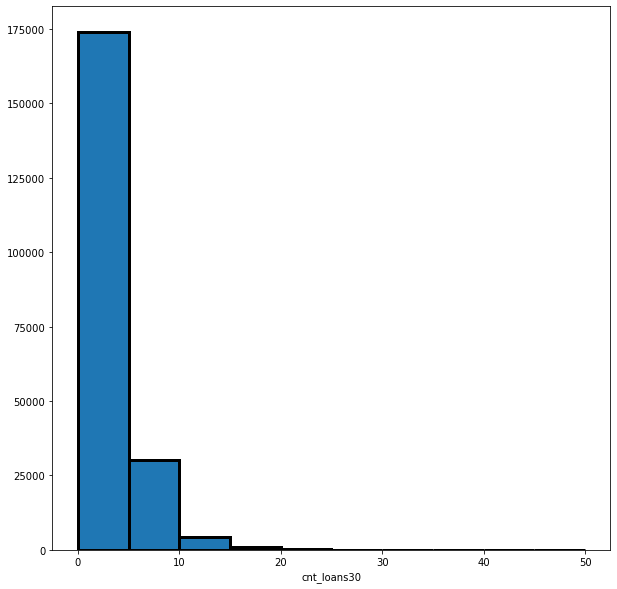

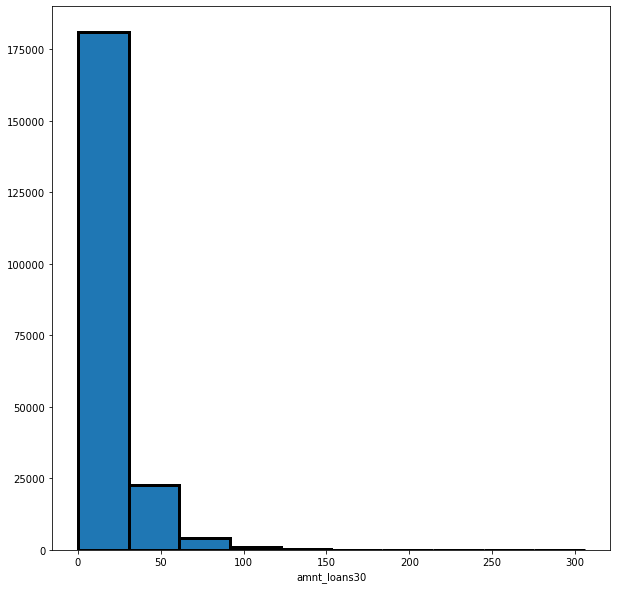

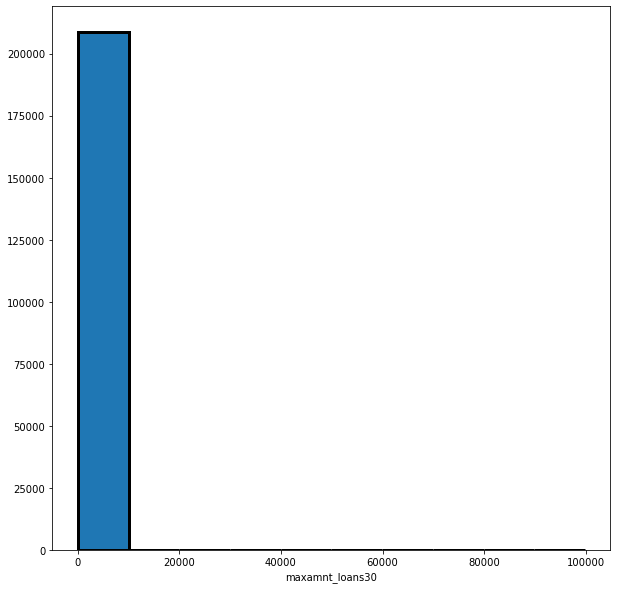

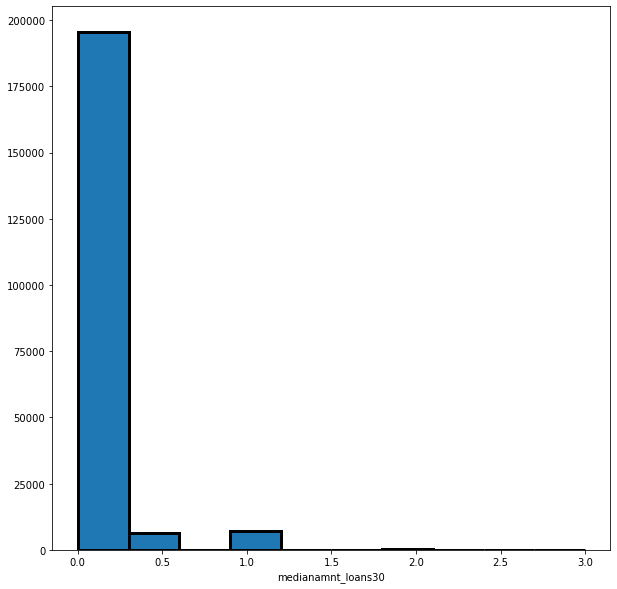

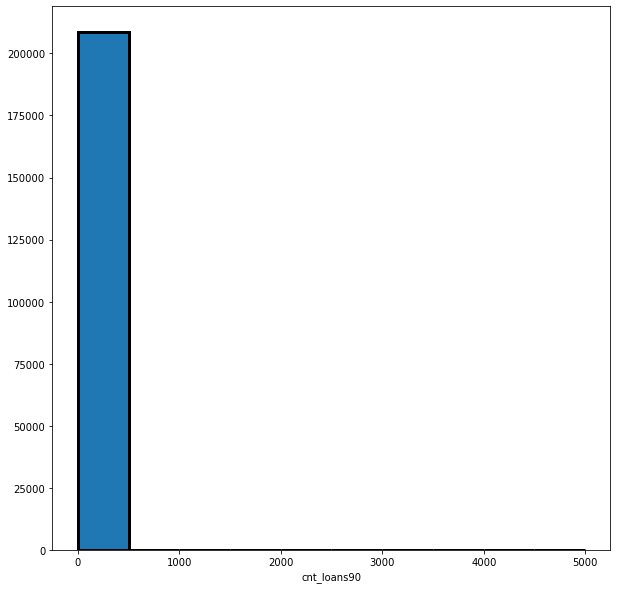

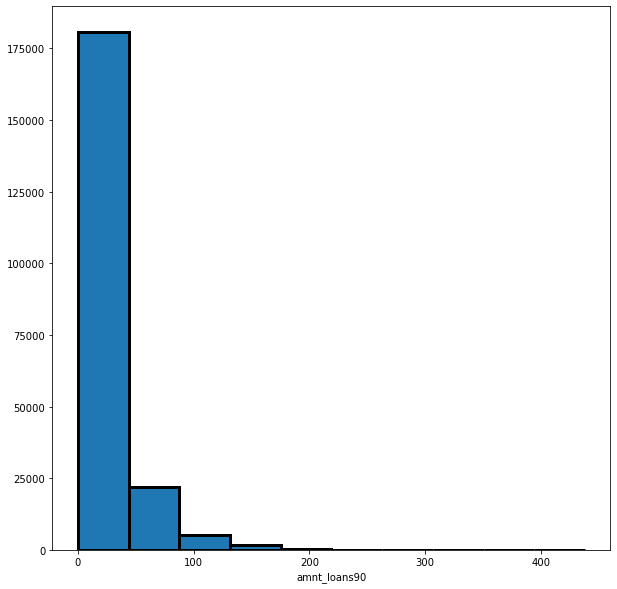

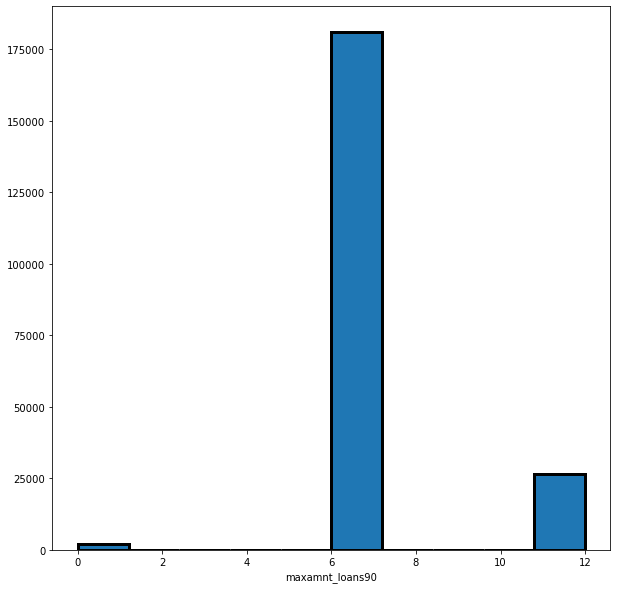

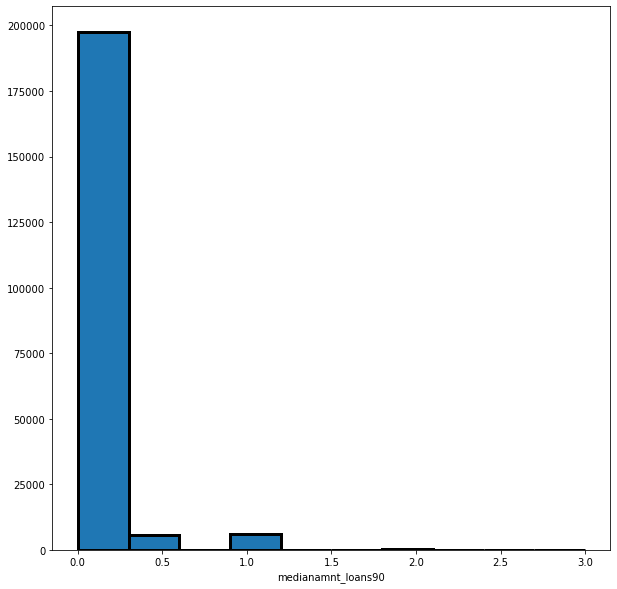

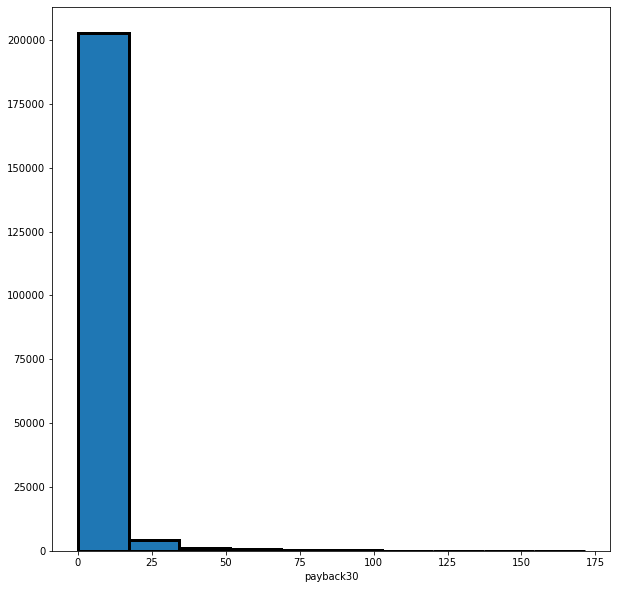

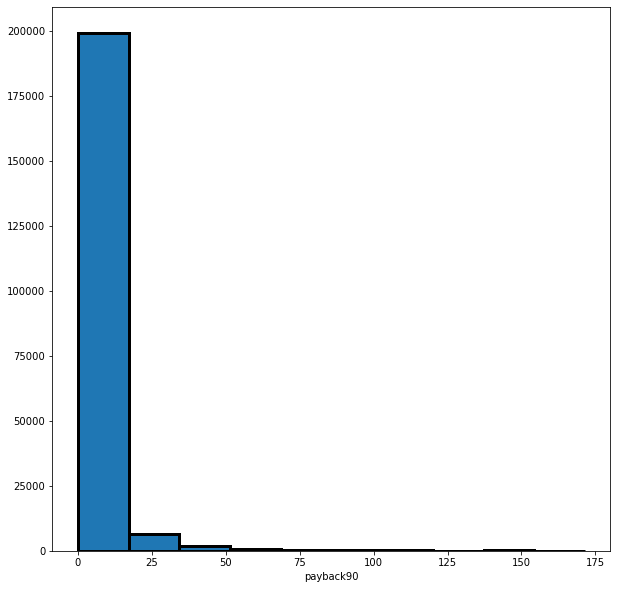

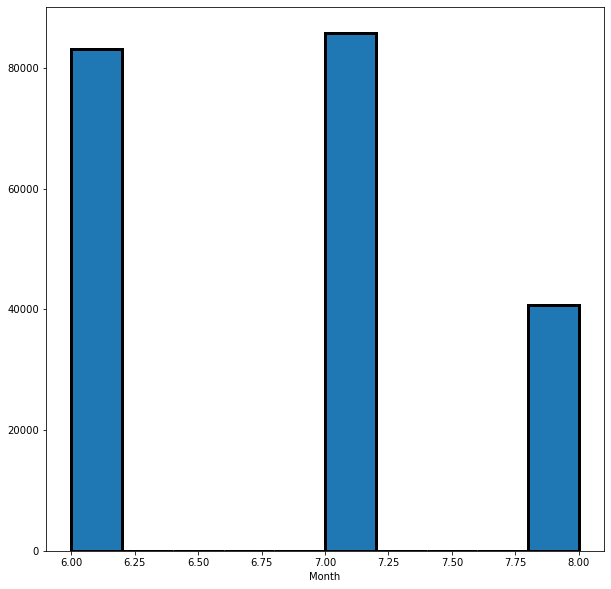

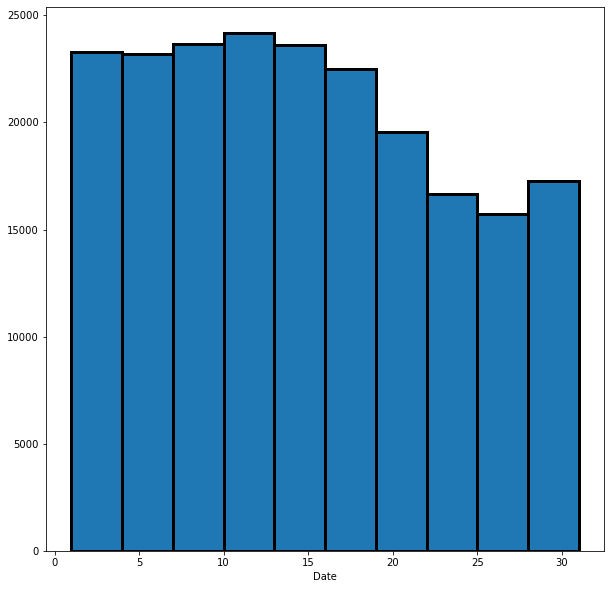

In [23]:
def hist_():
  for i in df:
    plt.figure(figsize=(10,10))
    b = plt.hist(df[i],linewidth=3,edgecolor='black')
    plt.xlabel(i)
hist_()

# Bivariate Analysis

Strip Plot

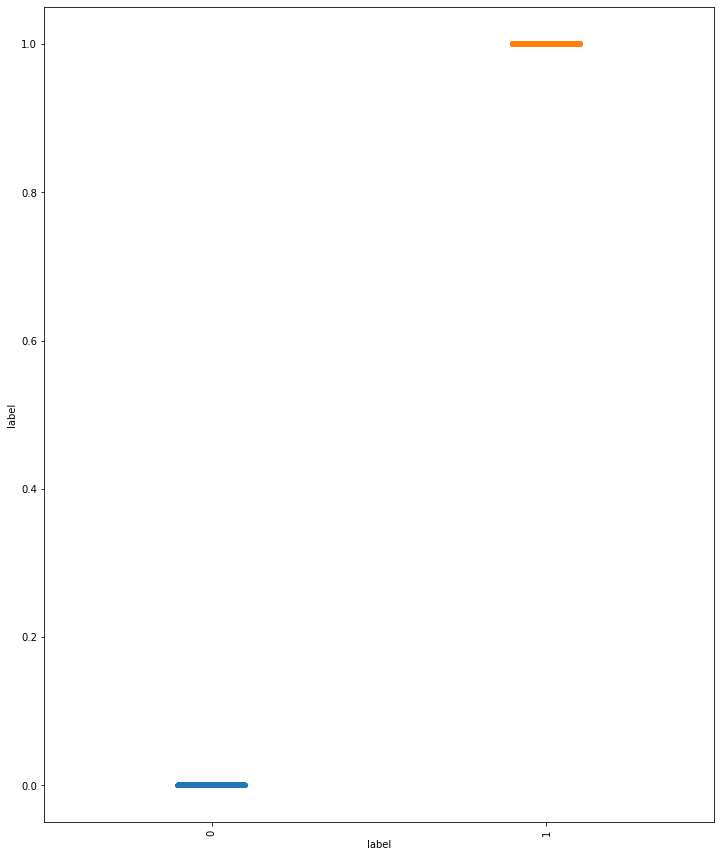

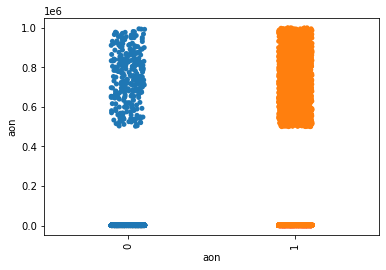

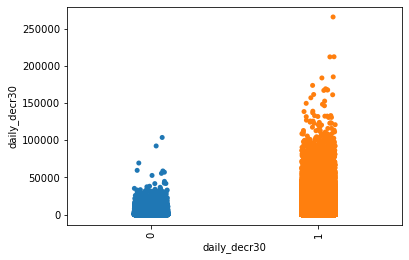

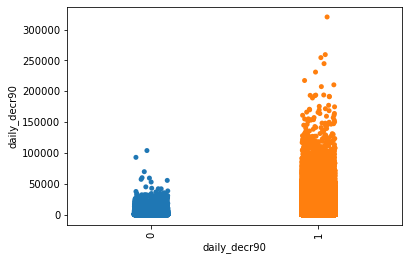

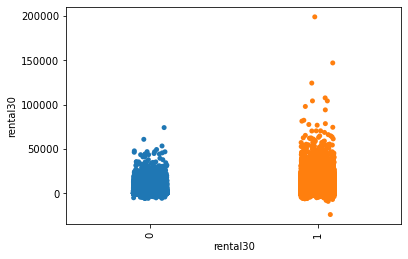

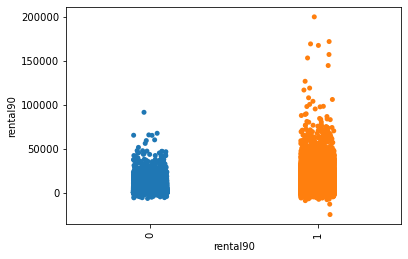

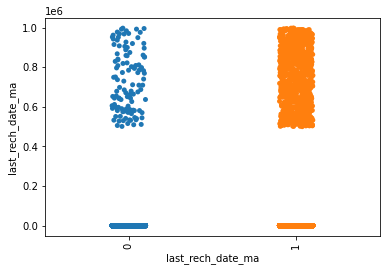

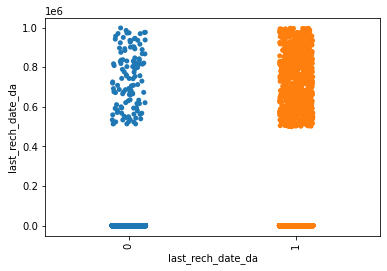

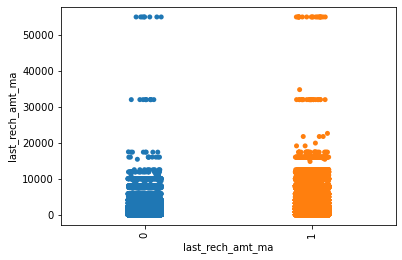

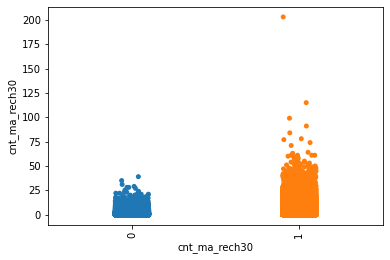

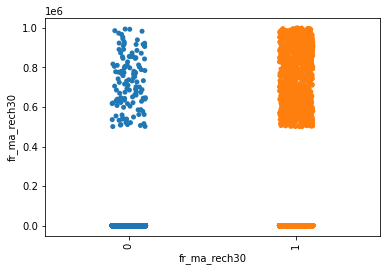

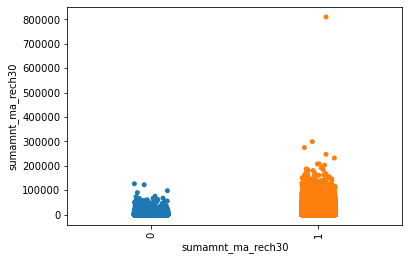

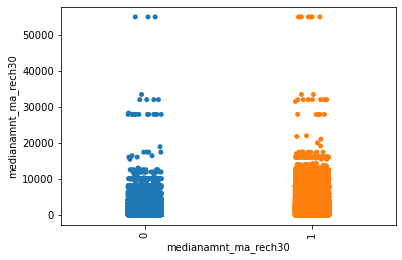

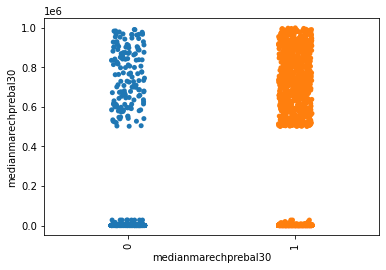

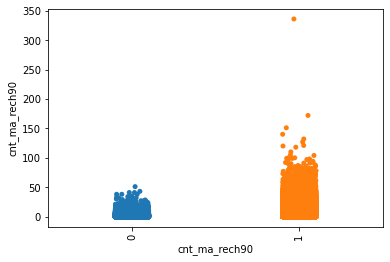

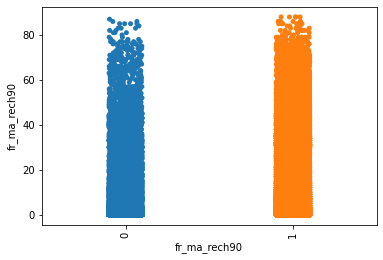

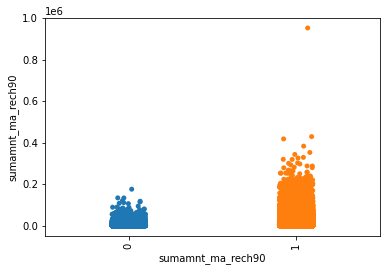

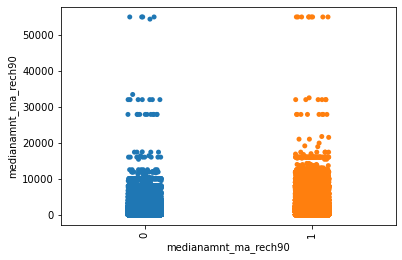

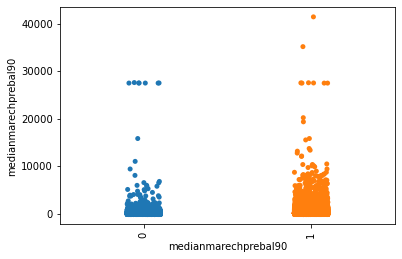

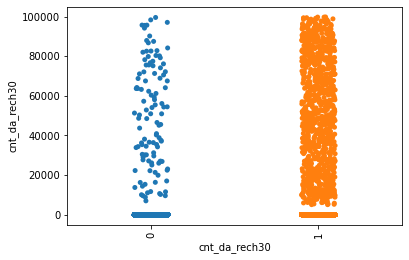

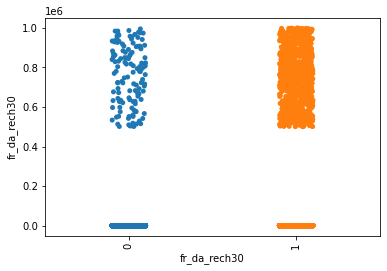

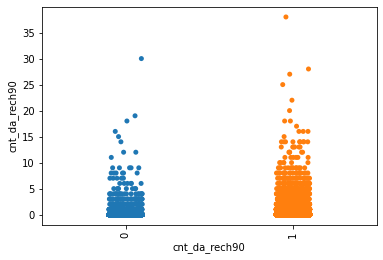

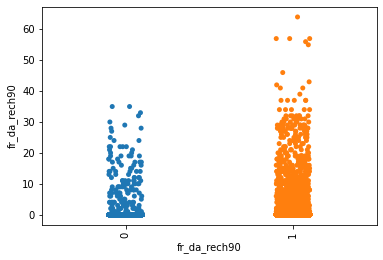

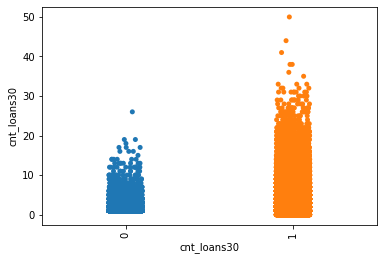

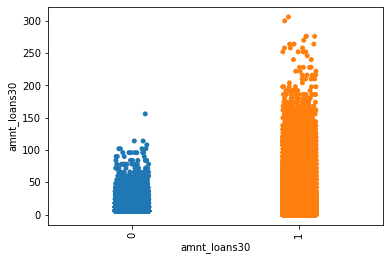

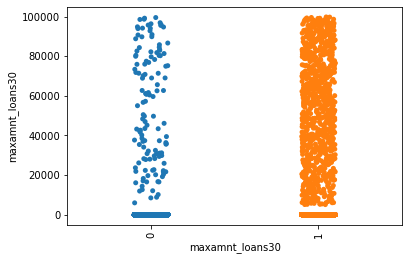

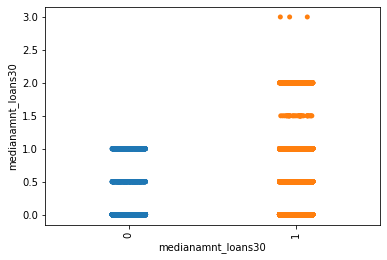

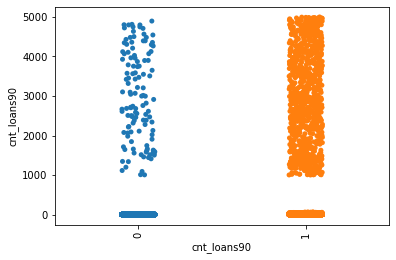

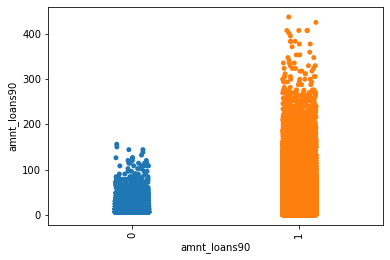

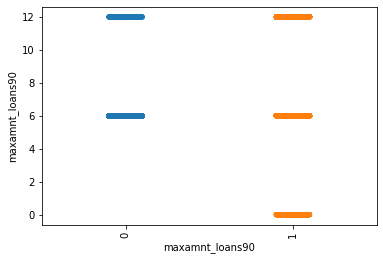

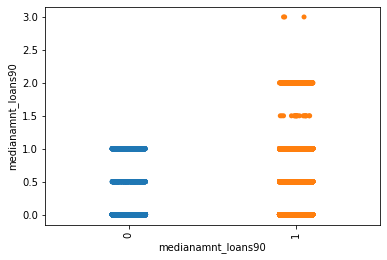

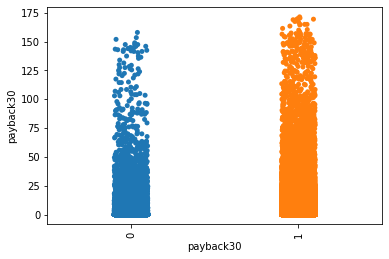

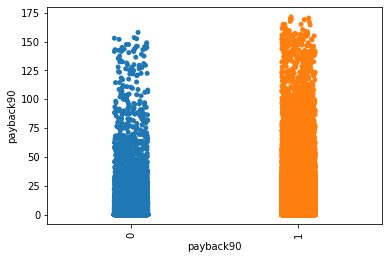

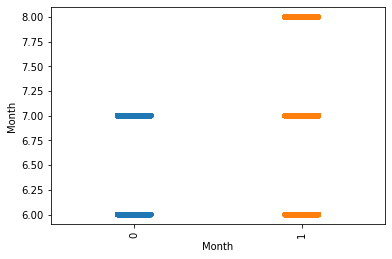

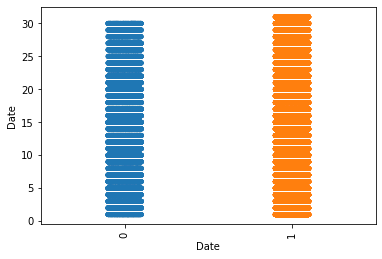

In [24]:
#Strip Plot
plt.figure(figsize=(12,15))
for i in df:
    sns.stripplot(df['label'],df[i])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

Scatter Plot

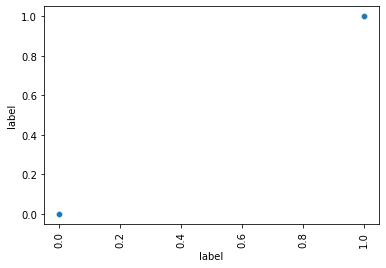

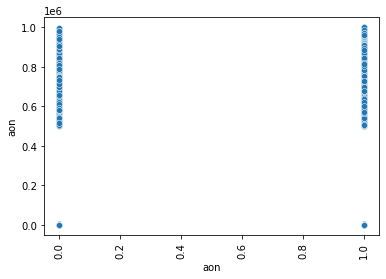

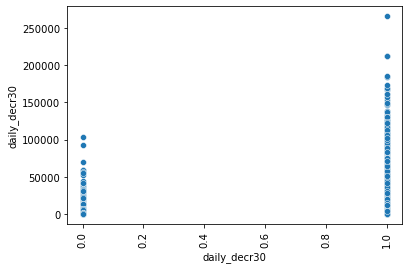

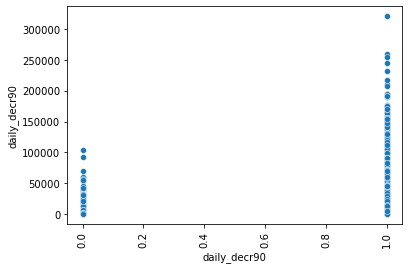

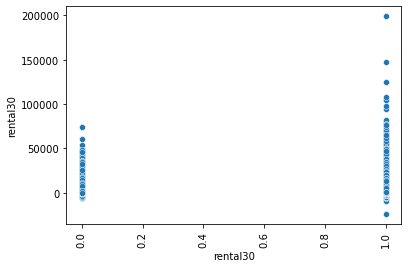

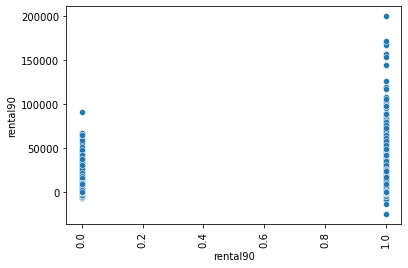

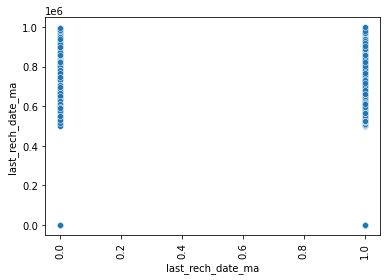

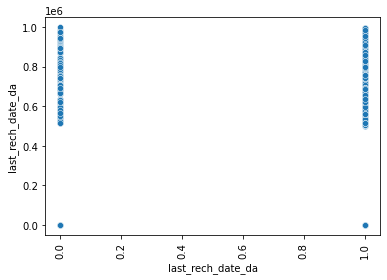

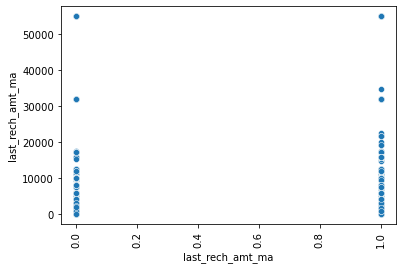

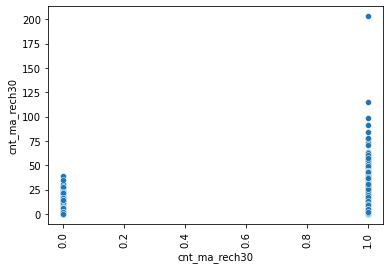

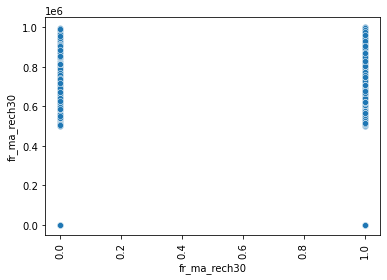

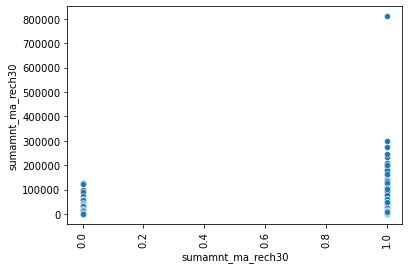

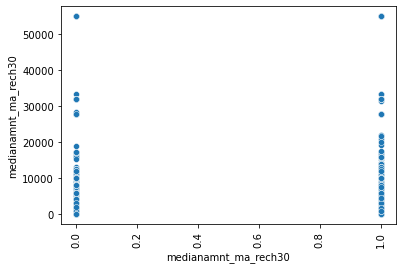

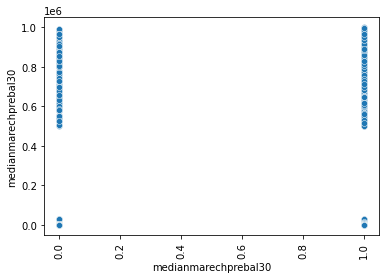

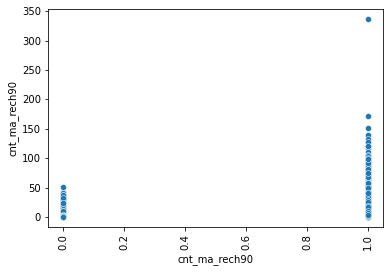

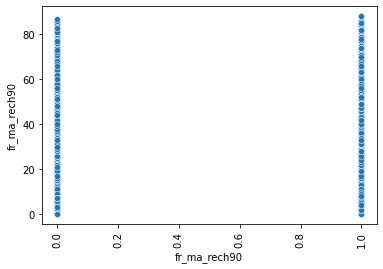

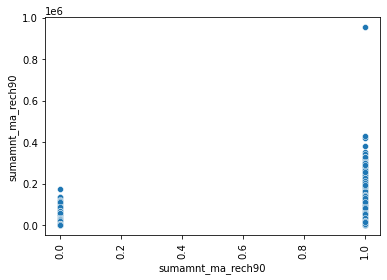

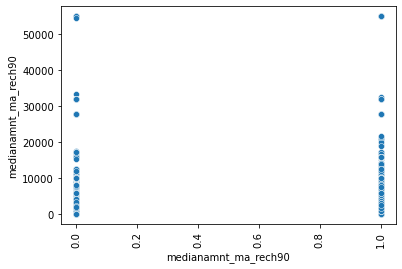

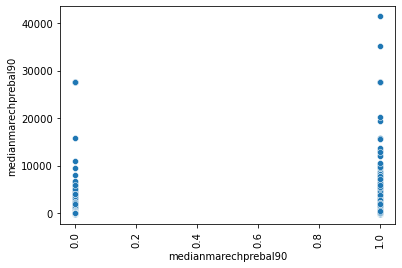

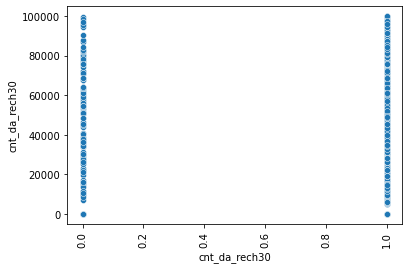

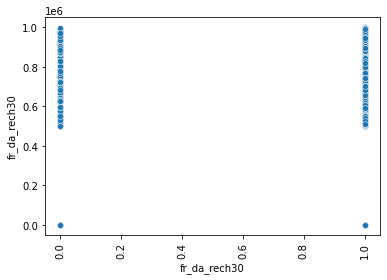

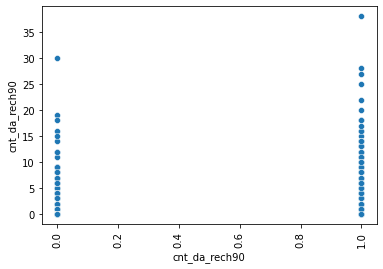

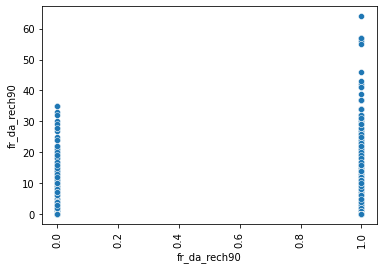

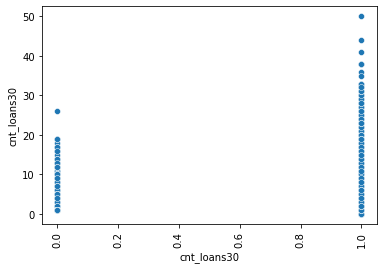

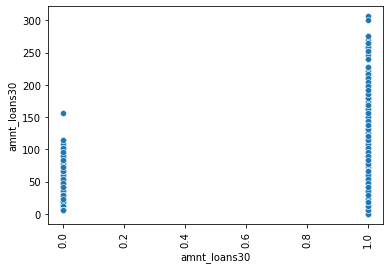

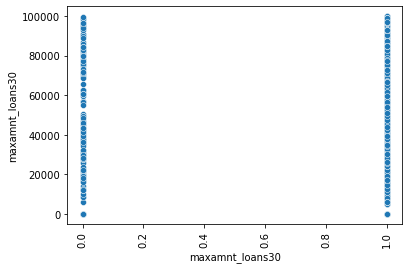

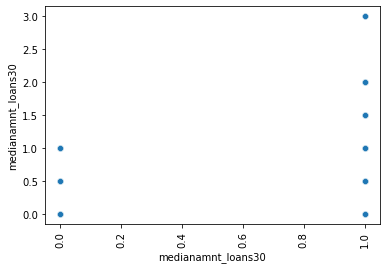

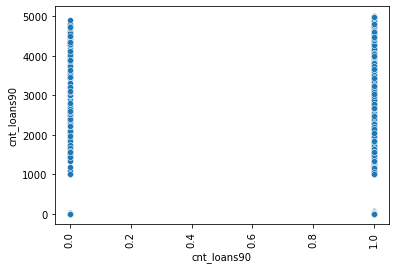

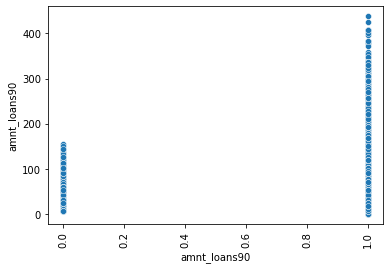

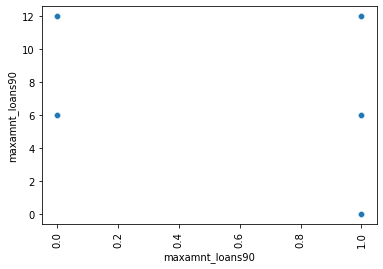

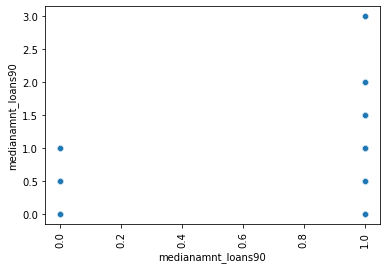

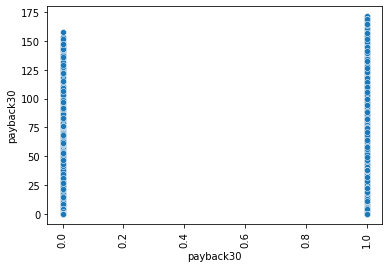

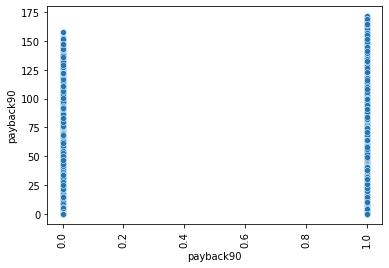

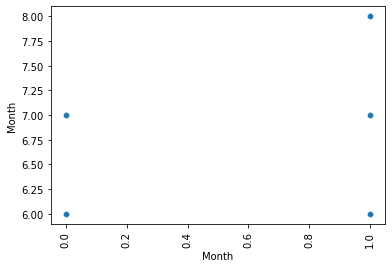

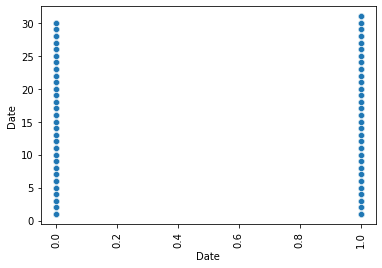

In [25]:
#Scatter Plot
for i in df:
    sns.scatterplot(df['label'],df[i])
    plt.xticks(rotation=90)
    plt.xlabel(i)
    plt.show()

# Outlier Detection

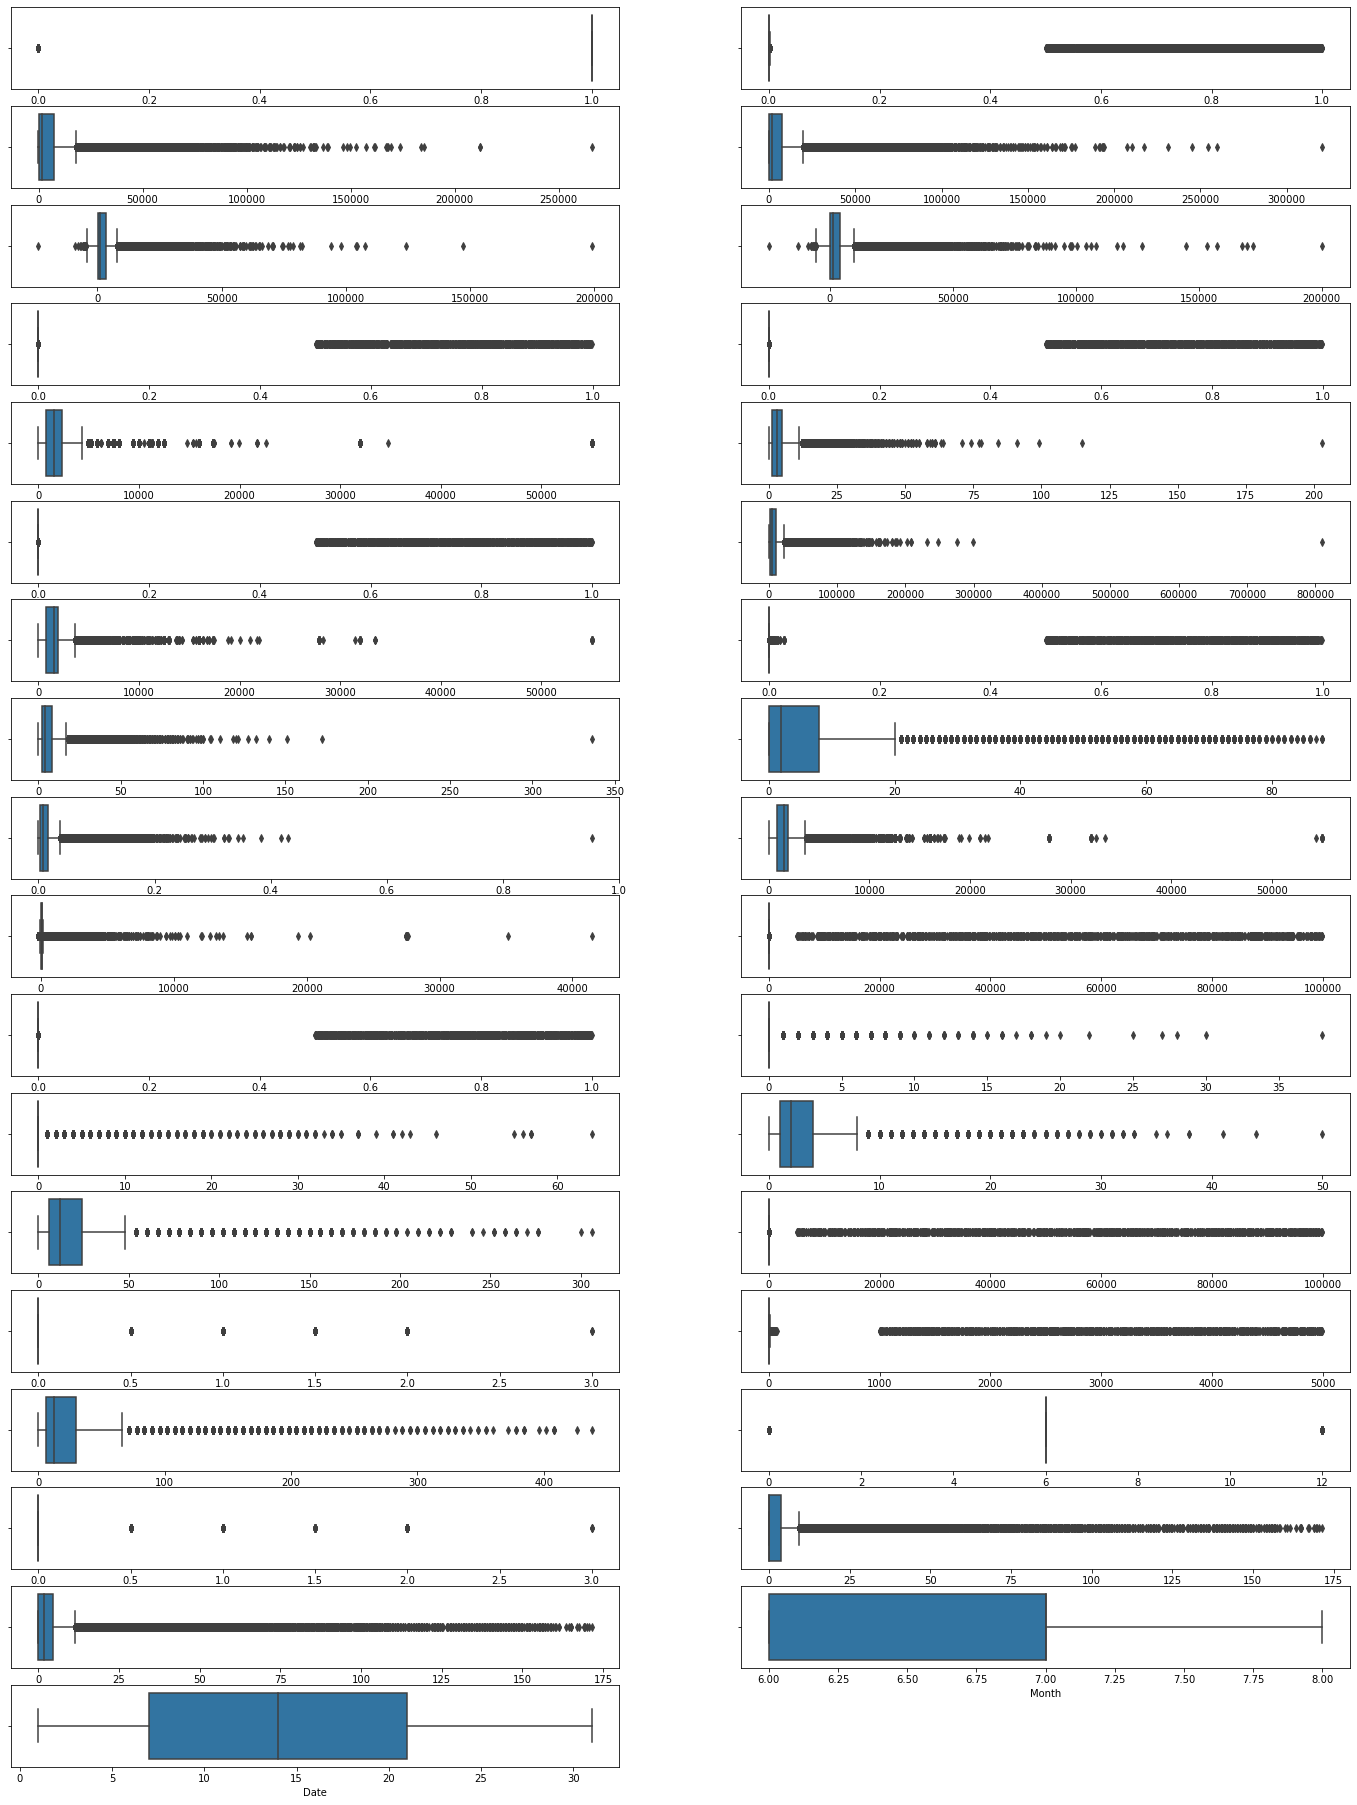

In [26]:
#using box plot I will check for outliers in the dataset
plt.figure(figsize=(24,36),facecolor='white')
plotno = 1
for i in df:
    if plotno <= 40:
        ax = plt.subplot(20,2,plotno)
        sns.boxplot(df[i])
    plotno += 1
plt.show()

In [27]:
#There are so many outliers present in the dataset.I will use Z score to tune the outliers.
#Zscore
from scipy.stats import zscore
z = np.abs(zscore(df))
z

label       aon  daily_decr30  daily_decr90  rental30  rental90  \
0       2.647889  0.103577      0.252300      0.276347  0.573842  0.558582   
1       0.377659  0.097764      0.731034      0.553377  0.231789  0.036020   
2       0.377659  0.100103      0.432011      0.429033  0.416018  0.447673   
3       0.377659  0.103987      0.581326      0.555125  0.587933  0.576035   
4       0.377659  0.094660      0.567293      0.543274  0.369884  0.413226   
...          ...       ...           ...           ...       ...       ...   
209588  0.377659  0.101833      0.567157      0.543160  0.372138  0.414909   
209589  0.377659  0.092969      0.579622      0.553686  0.223790  0.304143   
209590  0.377659  0.093788      0.700788      0.533192  0.735566  0.937497   
209591  0.377659  0.084289      0.770752      0.594556  0.529350  0.433038   
209592  0.377659  0.086284      0.096745      0.141747  0.512618  0.494277   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                0.069637           0.069550          0.221639       0.464758   
1                0.069303           0.069550          1.570173       0.699716   
2                0.069619           0.069550          0.221639       0.699716   
3                0.068914           0.069550          0.471346       0.934673   
4                0.069600           0.069550          0.103148       0.710029   
...                   ...                ...               ...            ...   
209588           0.069656           0.069550          0.836660       0.229801   
209589           0.069600           0.069550          0.544739       0.005157   
209590           0.069619           0.069550          0.221639       0.240114   
209591           0.069637           0.068838          0.544739       0.240114   
209592           0.069433           0.069550          2.303685       0.464758   

        ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0       ...         0.063285            0.247795     0.073493      0.439949   
1       ...         0.061871            0.247795     0.077941      0.439949   
2       ...         0.063285            0.247795     0.077941      0.666622   
3       ...         0.063285            0.247795     0.073493      0.439949   
4       ...         0.063285            0.247795     0.051251      0.693415   
...     ...              ...                 ...          ...           ...   
209588  ...         0.063285            0.247795     0.073493      0.439949   
209589  ...         0.063285            0.247795     0.069044      0.213276   
209590  ...         0.061871            0.247795     0.055699      1.146761   
209591  ...         0.061871            0.247795     0.069044      0.013396   
209592  ...         0.061871            0.247795     0.073493      0.213276   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90     Month  \
0              0.334212            0.229594   2.904852   2.394185  0.273361   
1              2.517683            0.229594   0.385626   0.419228  1.622097   
2              0.334212            0.229594   0.385626   0.419228  1.622097   
3              0.334212            0.229594   0.385626   0.419228  1.075375   
4              0.334212            0.229594   0.120875   0.192861  1.075375   
...                 ...                 ...        ...        ...       ...   
209588         0.334212            0.229594   0.272161   0.322214  1.075375   
209589         0.334212            0.229594   0.272161   0.322214  1.075375   
209590         2.517683            0.229594   0.068233   0.047340  0.273361   
209591         2.517683            0.229594   0.385626   0.599422  0.273361   
209592         2.517683            0.229594   0.385626   0.419228  0.273361   

            Date  
0       0.663726  
1       0.521266  
2       0.545227  
3       0.995262  
4       0.900724  
...          ...  
209588  0.308228  
209589  0.284267  
209590  1.730218  
209591  1.256

In [28]:
threshold = 3
df1 = df[(z < 3).all(axis=1)]
df1

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0       ...              6.0                 0.0          2.0            12   
1       ...             12.0                 0.0          1.0            12   
2       ...              6.0                 0.0          1.0             6   
3       ...              6.0                 0.0          2.0            12   
4       ...              6.0                 0.0          7.0            42   
...     ...              ...                 ...          ...           ...   
209588  ...              6.0                 0.0          2.0            12   
209589  ...              6.0                 0.0          3.0            18   
209590  ...             12.0                 0.0          6.0            54   
209591  ...             12.0                 0.0          3.0            24   
209592  ...             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  Month  Date  
0                     6                 0.0  29.000000  29.000000      7    20  
1                    12                 0.0   0.000000   0.000000      8    10  
2                     6                 0.0   0.000000   0.000000      8    19  
3                     6                 0.0   0.000000   0.000000      6     6  
4                     6                 0.0   2.333333   2.333333      6    22  
...                 ...                 ...        ...        ...    ...   ...  
209588                6                 0.0   1.000000   1.000000      6    17  
209589                6                 0.0   1.000000   1.000000      6    12  
209590               12                 0.0   4.000000   3.833333      7    29  
209591               12                 0.0   0.000000  10.500000      7    25  
209592               12                 0.0   0.000000   0.000000      7     7  

[161465 rows x 35 columns]

In [29]:
print(df.shape)# shape of the original data 
print(df1.shape)# shape of the data after using zscore to remove outliers

(209592, 35)
(161465, 35)


In [30]:
# reassigning the changed dataframe name to our original dataframe name
df = df1.copy()

df

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0       ...              6.0                 0.0          2.0            12   
1       ...             12.0                 0.0          1.0            12   
2       ...              6.0                 0.0          1.0             6   
3       ...              6.0                 0.0          2.0            12   
4       ...              6.0                 0.0          7.0            42   
...     ...              ...                 ...          ...           ...   
209588  ...              6.0                 0.0          2.0            12   
209589  ...              6.0                 0.0          3.0            18   
209590  ...             12.0                 0.0          6.0            54   
209591  ...             12.0                 0.0          3.0            24   
209592  ...             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  Month  Date  
0                     6                 0.0  29.000000  29.000000      7    20  
1                    12                 0.0   0.000000   0.000000      8    10  
2                     6                 0.0   0.000000   0.000000      8    19  
3                     6                 0.0   0.000000   0.000000      6     6  
4                     6                 0.0   2.333333   2.333333      6    22  
...                 ...                 ...        ...        ...    ...   ...  
209588                6                 0.0   1.000000   1.000000      6    17  
209589                6                 0.0   1.000000   1.000000      6    12  
209590               12                 0.0   4.000000   3.833333      7    29  
209591               12                 0.0   0.000000  10.500000      7    25  
209592               12                 0.0   0.000000   0.000000      7     7  

[161465 rows x 35 columns]

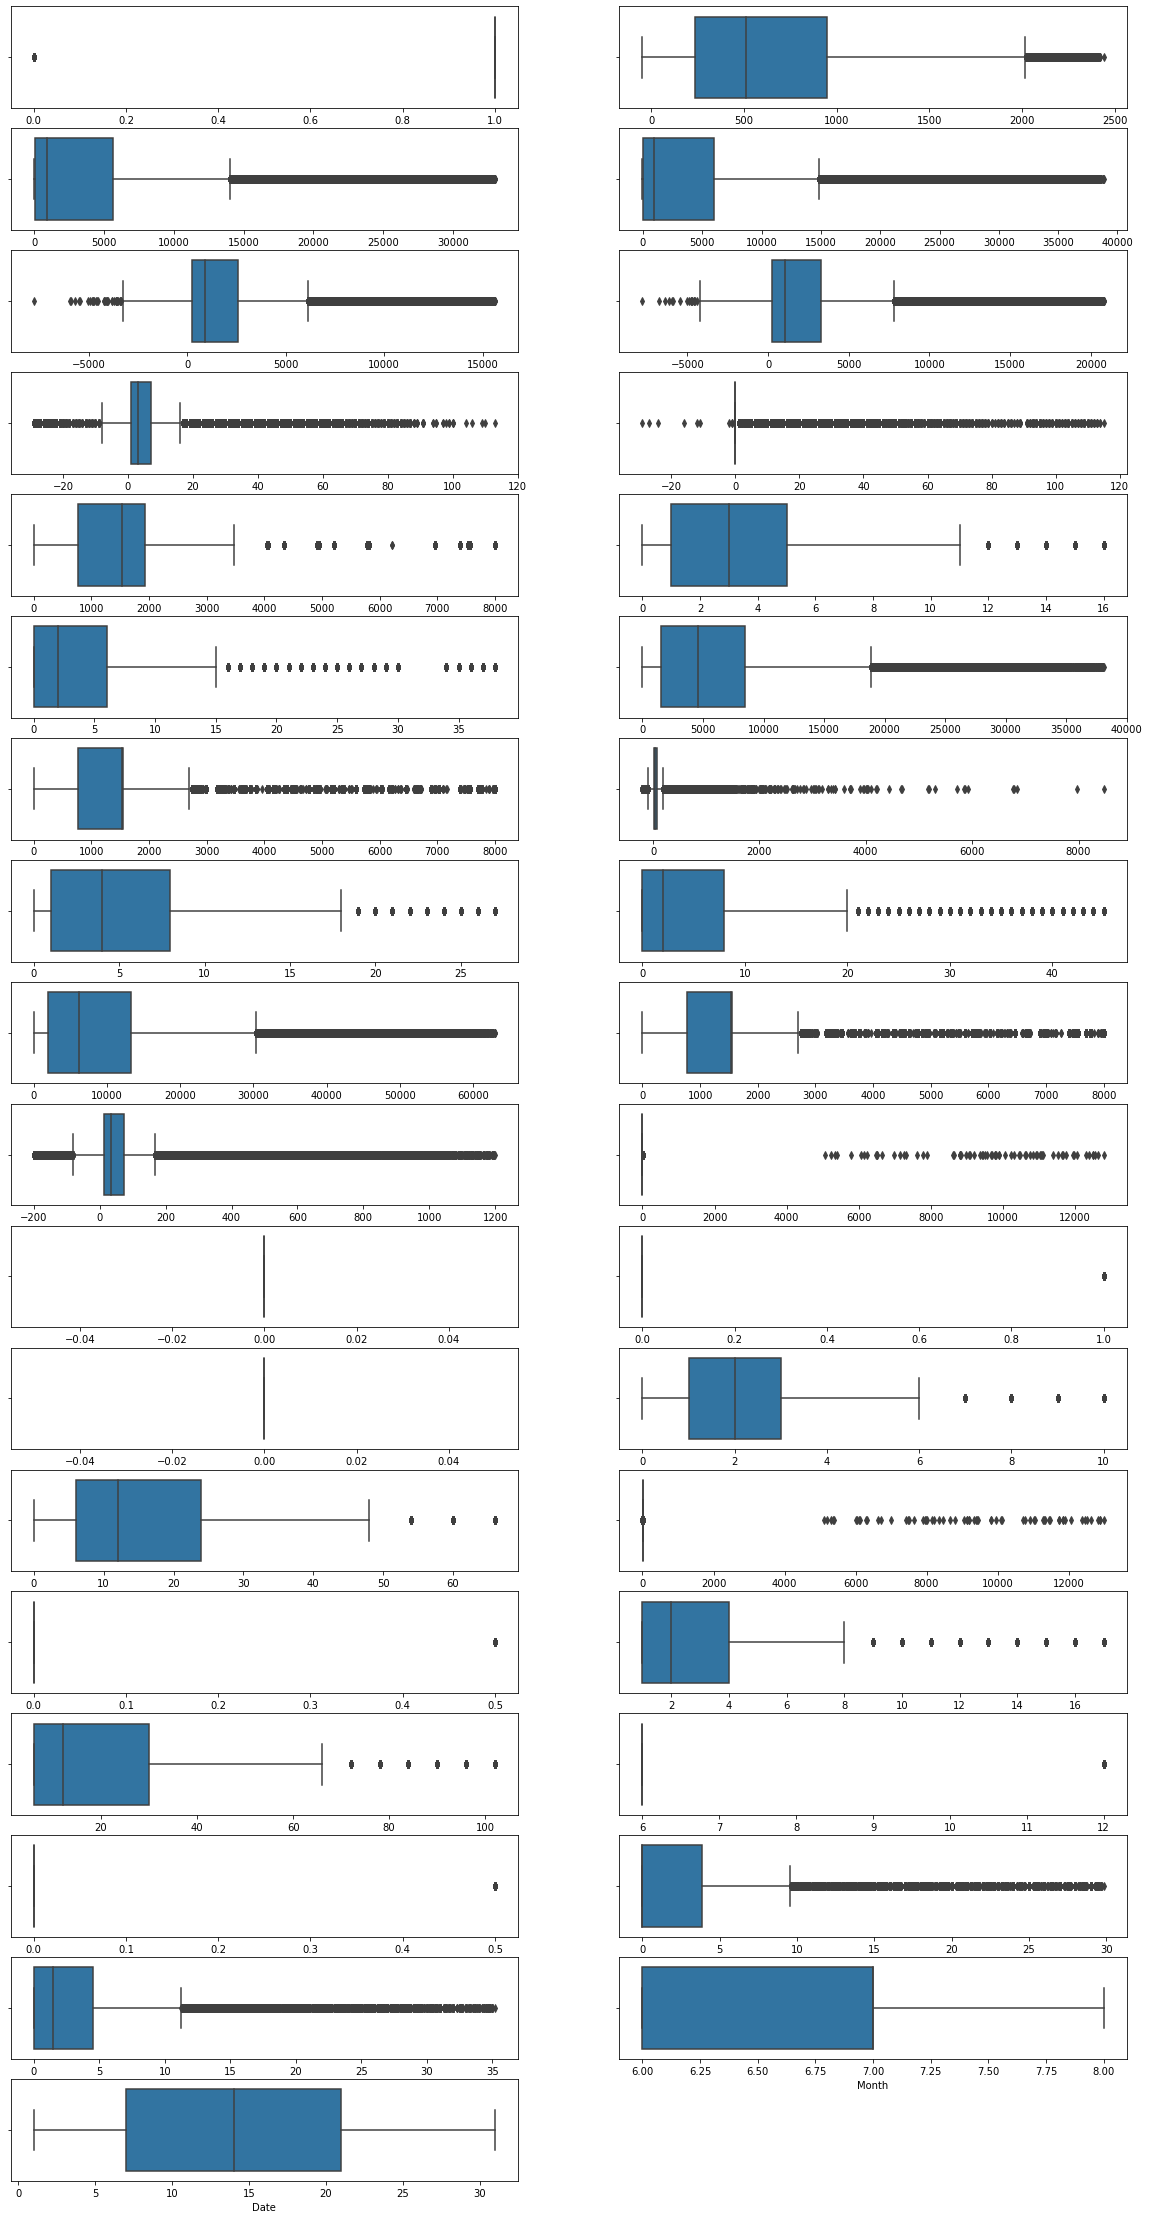

In [31]:
#Plotting Box Plot
plt.figure(figsize=(20,40))
plot = 1
for i in df:
    if plot < 36:
        ax = plt.subplot(18,2,plot)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plot += 1
plt.show()

# Correlation Matrix

In [32]:
#Finding correlation
df_corr = df.corr()

df_corr

label       aon  daily_decr30  daily_decr90  \
label                 1.000000  0.086376      0.191662      0.192073   
aon                   0.086376  1.000000      0.071687      0.073848   
daily_decr30          0.191662  0.071687      1.000000      0.979246   
daily_decr90          0.192073  0.073848      0.979246      1.000000   
rental30              0.048945  0.052519      0.445846      0.433199   
rental90              0.069545  0.057465      0.495649      0.504950   
last_rech_date_ma    -0.095769  0.015165     -0.046021     -0.040094   
last_rech_date_da     0.026123 -0.000733      0.058444      0.060433   
last_rech_amt_ma      0.159589  0.081721      0.257911      0.247432   
cnt_ma_rech30         0.292492  0.015264      0.396178      0.373330   
fr_ma_rech30          0.165446  0.044654      0.108481      0.111613   
sumamnt_ma_rech30     0.270259  0.056602      0.517794      0.486043   
medianamnt_ma_rech30  0.171223  0.084110      0.269856      0.258592   
medianmarechprebal30  0.117063  0.022863      0.089511      0.089299   
cnt_ma_rech90         0.293923  0.038716      0.583050      0.589801   
fr_ma_rech90          0.125260  0.043040     -0.029171     -0.029700   
sumamnt_ma_rech90     0.272042  0.078466      0.697876      0.702235   
medianamnt_ma_rech90  0.148804  0.088960      0.230617      0.224029   
medianmarechprebal90  0.124172  0.019193      0.047657      0.045234   
cnt_da_rech30         0.000279 -0.004037     -0.002282     -0.002404   
fr_da_rech30               NaN       NaN           NaN           NaN   
cnt_da_rech90         0.025171  0.011916      0.029741      0.028733   
fr_da_rech90               NaN       NaN           NaN           NaN   
cnt_loans30           0.238983  0.049552      0.328738      0.303358   
amnt_loans30          0.244307  0.052399      0.420826      0.396451   
maxamnt_loans30       0.002689  0.002055      0.003933      0.003916   
medianamnt_loans30    0.040130  0.000348      0.010631      0.013181   
cnt_loans90           0.244240  0.082985      0.514988      0.517802   
amnt_loans90          0.246878  0.083288      0.570296      0.573994   
maxamnt_loans90       0.088565  0.029714      0.434206      0.436362   
medianamnt_loans90    0.029620 -0.004733     -0.027961     -0.028166   
payback30             0.142282  0.021474      0.148301      0.139665   
payback90             0.141053  0.041227      0.194491      0.190416   
Month                 0.139512  0.064493      0.613791      0.642152   
Date                  0.011526  0.013302      0.032657      0.002120   

                      rental30  rental90  last_rech_date_ma  \
label                 0.048945  0.069545          -0.095769   
aon                   0.052519  0.057465           0.015165   
daily_decr30          0.445846  0.495649          -0.046021   
daily_decr90          0.433199  0.504950          -0.040094   
rental30              1.000000  0.950336          -0.017986   
rental90              0.950336  1.000000          -0.005881   
last_rech_date_ma    -0.017986 -0.005881           1.000000   
last_rech_date_da     0.011158  0.019024           0.025265   
last_rech_amt_ma      0.089045  0.090056           0.230253   
cnt_ma_rech30         0.237642  0.233016          -0.246814   
fr_ma_rech30          0.070310  0.080419          -0.144294   
sumamnt_ma_rech30     0.251540  0.242117          -0.164319   
medianamnt_ma_rech30  0.091594  0.090687           0.032274   
medianmarechprebal30  0.025976  0.031934          -0.005077   
cnt_ma_rech90         0.325945  0.369840          -0.160966   
fr_ma_rech90         -0.018376 -0.019041          -0.005486   
sumamnt_ma_rech90     0.329694  0.367041          -0.078957   
medianamnt_ma_rech90  0.069448  0.069033           0.218842   
medianmarechprebal90 -0.003297 -0.002985           0.077618   
cnt_da_rech30        -0.005004 -0.004930          -0.000481   
fr_da_rech30               NaN       NaN                NaN   
cnt_da_rech90        -0.003383 -0.001846      

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.


<AxesSubplot:>

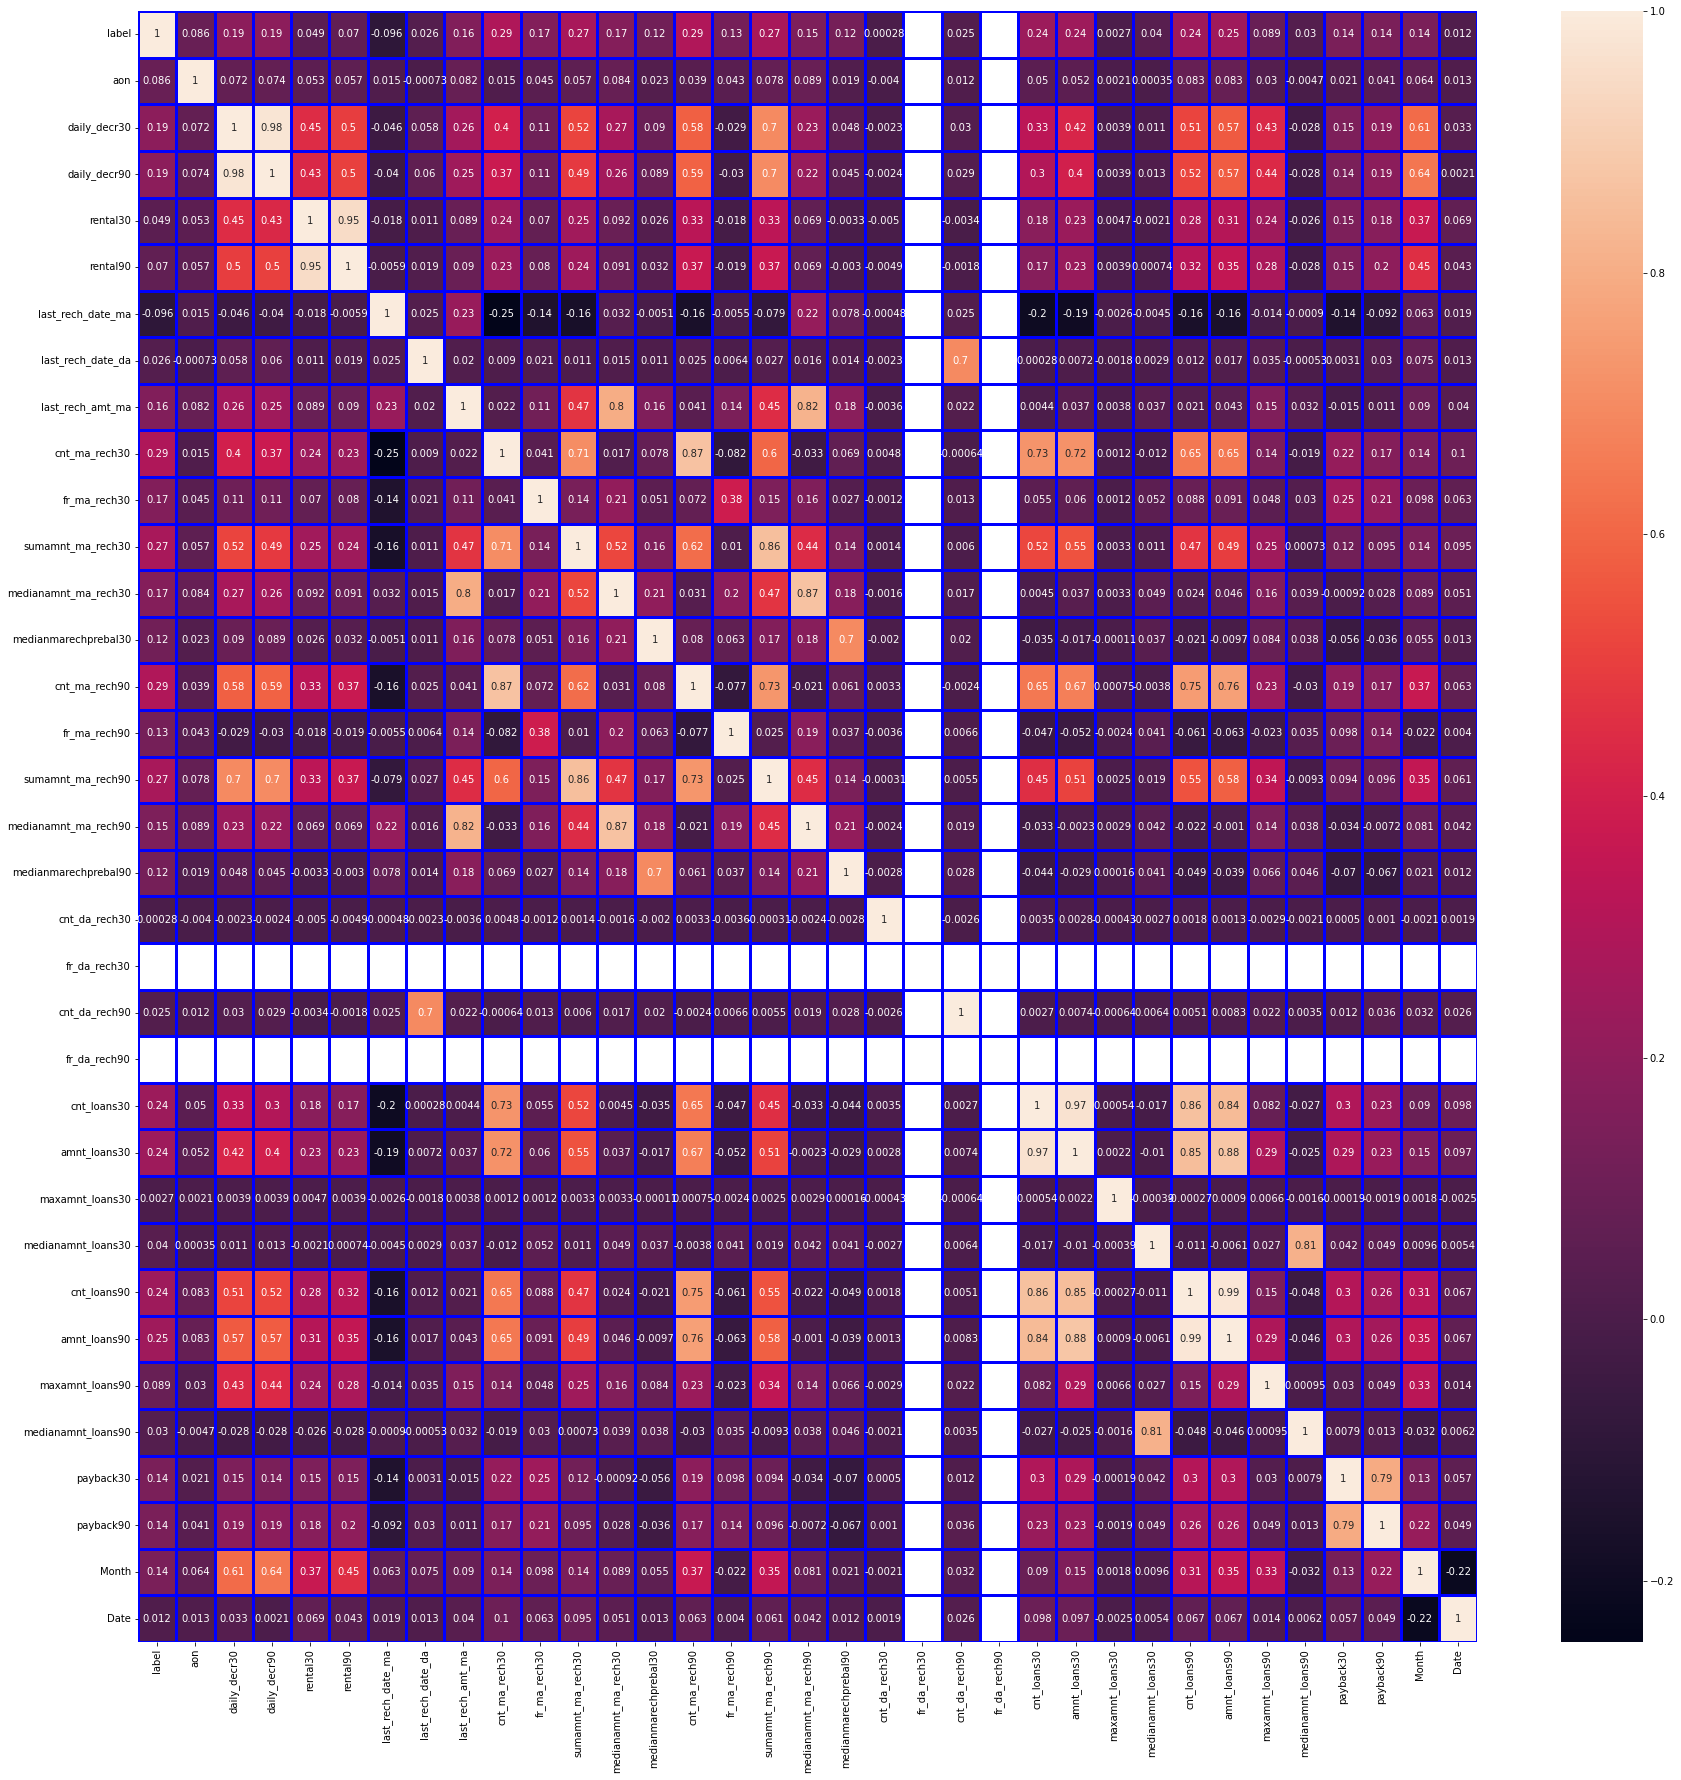

In [33]:
#Correlation Matrix
plt.figure(figsize=(30,30))
sns.heatmap(df_corr.T,annot=True,linewidth=3,linecolor='blue')

In [34]:
#Dropping variables which are not contributing to target variable
df = df.drop(['fr_da_rech30','fr_da_rech90'],axis=1)

In [35]:
df

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0       ...              6.0                 0.0          2.0            12   
1       ...             12.0                 0.0          1.0            12   
2       ...              6.0                 0.0          1.0             6   
3       ...              6.0                 0.0          2.0            12   
4       ...              6.0                 0.0          7.0            42   
...     ...              ...                 ...          ...           ...   
209588  ...              6.0                 0.0          2.0            12   
209589  ...              6.0                 0.0          3.0            18   
209590  ...             12.0                 0.0          6.0            54   
209591  ...             12.0                 0.0          3.0            24   
209592  ...             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  Month  Date  
0                     6                 0.0  29.000000  29.000000      7    20  
1                    12                 0.0   0.000000   0.000000      8    10  
2                     6                 0.0   0.000000   0.000000      8    19  
3                     6                 0.0   0.000000   0.000000      6     6  
4                     6                 0.0   2.333333   2.333333      6    22  
...                 ...                 ...        ...        ...    ...   ...  
209588                6                 0.0   1.000000   1.000000      6    17  
209589                6                 0.0   1.000000   1.000000      6    12  
209590               12                 0.0   4.000000   3.833333      7    29  
209591               12                 0.0   0.000000  10.500000      7    25  
209592               12                 0.0   0.000000   0.000000      7     7  

[161465 rows x 33 columns]

In [36]:
#Updated Correlation
df_corr = df.corr()

df_corr

label       aon  daily_decr30  daily_decr90  \
label                 1.000000  0.086376      0.191662      0.192073   
aon                   0.086376  1.000000      0.071687      0.073848   
daily_decr30          0.191662  0.071687      1.000000      0.979246   
daily_decr90          0.192073  0.073848      0.979246      1.000000   
rental30              0.048945  0.052519      0.445846      0.433199   
rental90              0.069545  0.057465      0.495649      0.504950   
last_rech_date_ma    -0.095769  0.015165     -0.046021     -0.040094   
last_rech_date_da     0.026123 -0.000733      0.058444      0.060433   
last_rech_amt_ma      0.159589  0.081721      0.257911      0.247432   
cnt_ma_rech30         0.292492  0.015264      0.396178      0.373330   
fr_ma_rech30          0.165446  0.044654      0.108481      0.111613   
sumamnt_ma_rech30     0.270259  0.056602      0.517794      0.486043   
medianamnt_ma_rech30  0.171223  0.084110      0.269856      0.258592   
medianmarechprebal30  0.117063  0.022863      0.089511      0.089299   
cnt_ma_rech90         0.293923  0.038716      0.583050      0.589801   
fr_ma_rech90          0.125260  0.043040     -0.029171     -0.029700   
sumamnt_ma_rech90     0.272042  0.078466      0.697876      0.702235   
medianamnt_ma_rech90  0.148804  0.088960      0.230617      0.224029   
medianmarechprebal90  0.124172  0.019193      0.047657      0.045234   
cnt_da_rech30         0.000279 -0.004037     -0.002282     -0.002404   
cnt_da_rech90         0.025171  0.011916      0.029741      0.028733   
cnt_loans30           0.238983  0.049552      0.328738      0.303358   
amnt_loans30          0.244307  0.052399      0.420826      0.396451   
maxamnt_loans30       0.002689  0.002055      0.003933      0.003916   
medianamnt_loans30    0.040130  0.000348      0.010631      0.013181   
cnt_loans90           0.244240  0.082985      0.514988      0.517802   
amnt_loans90          0.246878  0.083288      0.570296      0.573994   
maxamnt_loans90       0.088565  0.029714      0.434206      0.436362   
medianamnt_loans90    0.029620 -0.004733     -0.027961     -0.028166   
payback30             0.142282  0.021474      0.148301      0.139665   
payback90             0.141053  0.041227      0.194491      0.190416   
Month                 0.139512  0.064493      0.613791      0.642152   
Date                  0.011526  0.013302      0.032657      0.002120   

                      rental30  rental90  last_rech_date_ma  \
label                 0.048945  0.069545          -0.095769   
aon                   0.052519  0.057465           0.015165   
daily_decr30          0.445846  0.495649          -0.046021   
daily_decr90          0.433199  0.504950          -0.040094   
rental30              1.000000  0.950336          -0.017986   
rental90              0.950336  1.000000          -0.005881   
last_rech_date_ma    -0.017986 -0.005881           1.000000   
last_rech_date_da     0.011158  0.019024           0.025265   
last_rech_amt_ma      0.089045  0.090056           0.230253   
cnt_ma_rech30         0.237642  0.233016          -0.246814   
fr_ma_rech30          0.070310  0.080419          -0.144294   
sumamnt_ma_rech30     0.251540  0.242117          -0.164319   
medianamnt_ma_rech30  0.091594  0.090687           0.032274   
medianmarechprebal30  0.025976  0.031934          -0.005077   
cnt_ma_rech90         0.325945  0.369840          -0.160966   
fr_ma_rech90         -0.018376 -0.019041          -0.005486   
sumamnt_ma_rech90     0.329694  0.367041          -0.078957   
medianamnt_ma_rech90  0.069448  0.069033           0.218842   
medianmarechprebal90 -0.003297 -0.002985           0.077618   
cnt_da_rech30        -0.005004 -0.004930          -0.000481   
cnt_da_rech90        -0.003383 -0.001846           0.025350   
cnt_loans30           0.183447  0.173975          -0.200247   
amnt_loans30          0.230621  0.229866          -0.194832   
maxamnt_loans30       0.004687  0.003907          -0.002617   
m

<AxesSubplot:>

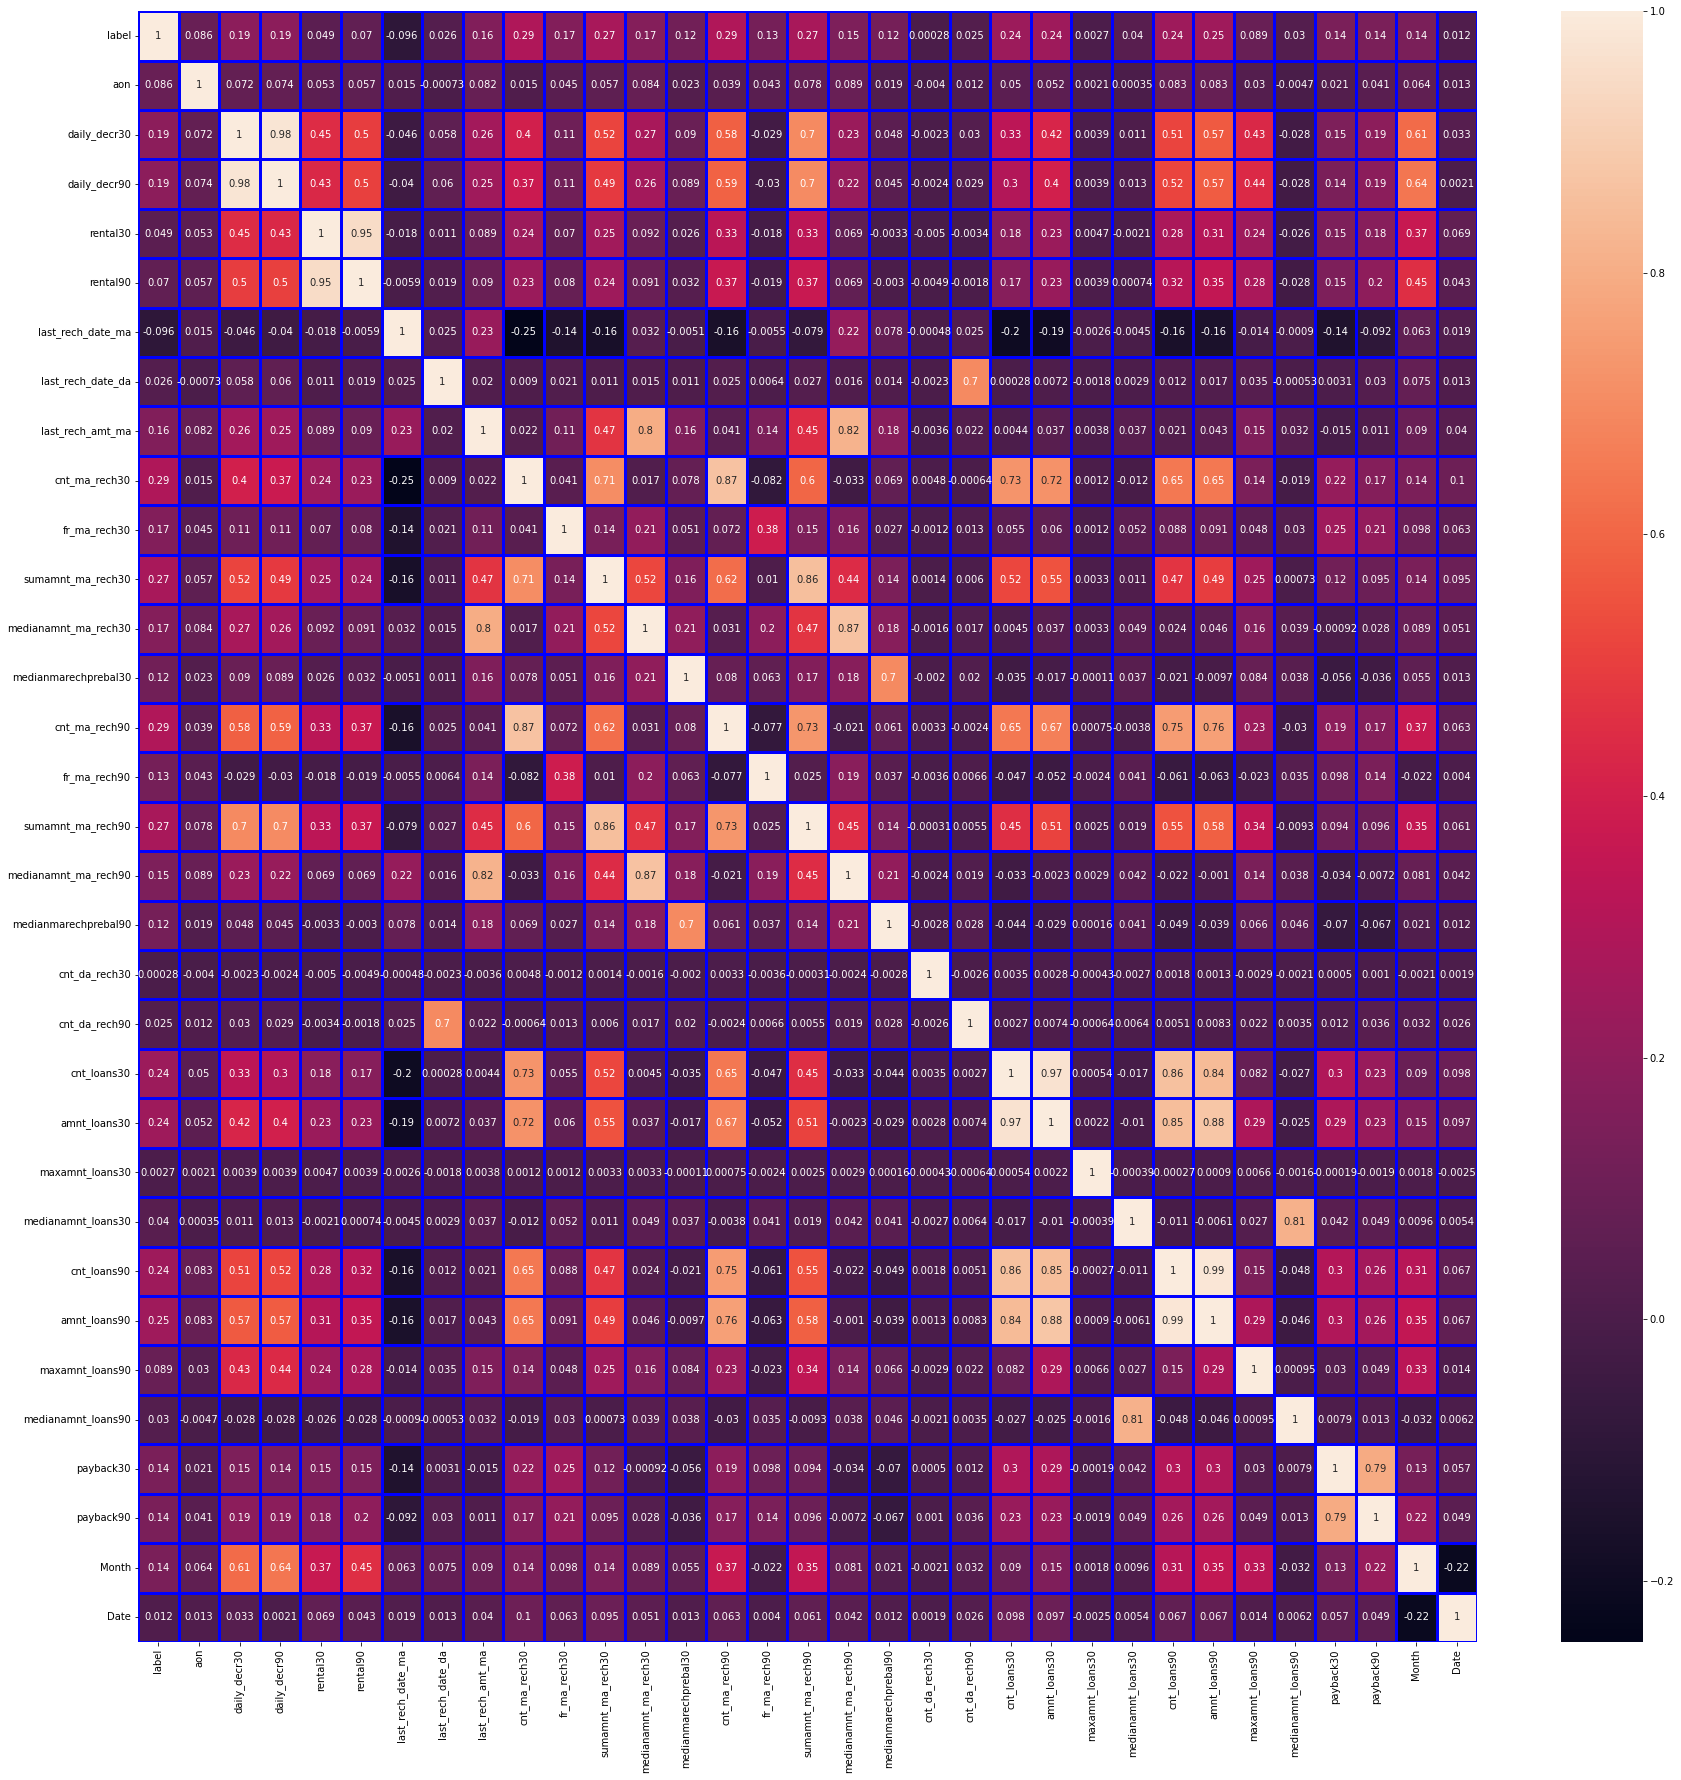

In [37]:
#Updated Correlation Matrix
plt.figure(figsize=(30,30))
sns.heatmap(df_corr.T,annot=True,linewidth=3,linecolor='blue')

Correlation Bar using Target variable with Features

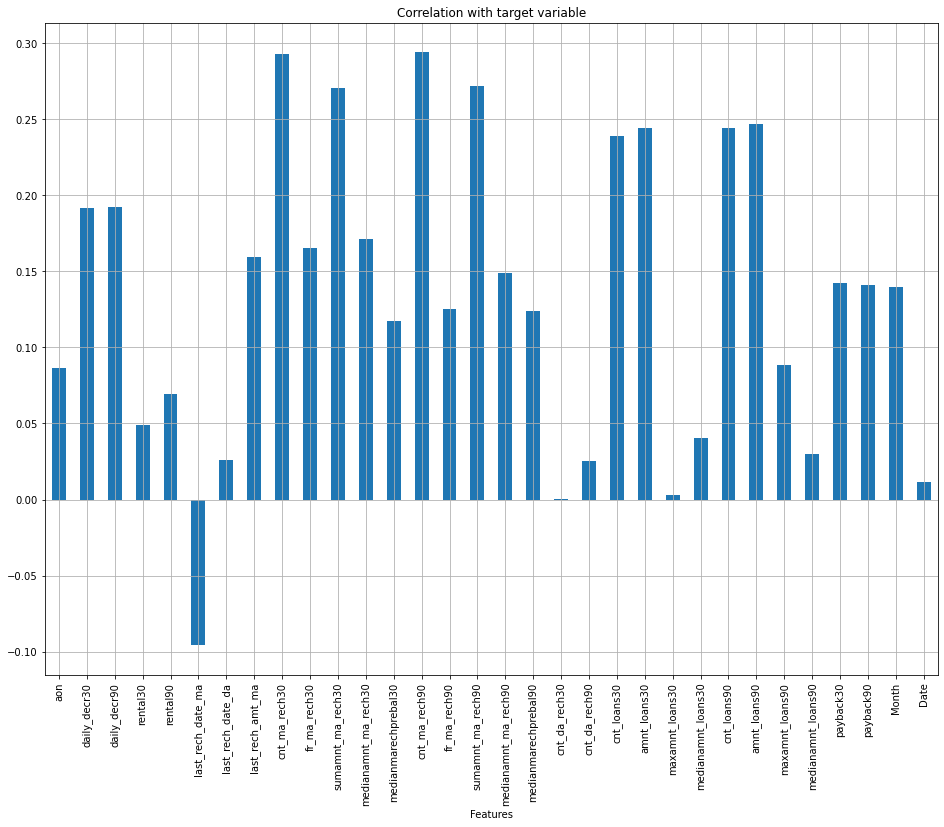

In [38]:
plt.figure(figsize=(16,12))
df.drop('label',axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.title('Correlation with target variable');
plt.xlabel("Features");

In the above Bar Plot we are able to clearly define the feature columns that are positively correlated with our label and the feature columns that are negatively correlated with our label.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [39]:
X = df.drop(['label'],axis=1)
Y = df['label']

In [40]:
X.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
1  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
2  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
3  241.0     21.228000     21.228000    159.42    159.42               41.0   
4  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  ...  \
0                0.0              1539              2          21.0  ...   
1                0.0              5787              1           0.0  ...   
2                0.0              1539              1           0.0  ...   
3                0.0               947              0           0.0  ...   
4                0.0              2309              7           2.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  Month  Date  
0                6                 0.0  29.000000  29.000000      7    20  
1               12                 0.0   0.000000   0.000000      8    10  
2                6                 0.0   0.000000   0.000000      8    19  
3                6                 0.0   0.000000   0.000000      6     6  
4                6                 0.0   2.333333   2.333333      6    22  

[5 rows x 32 columns]

In [41]:
Y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [42]:
X.shape

(161465, 32)

In [43]:
Y.shape

(161465,)

# Resolving the class imbalance issue in our label column

In [44]:
Y.value_counts()

# adding samples to make all the categorical label values same

from imblearn.over_sampling import SMOTE

oversample =SMOTE()

X,Y = oversample.fit_resample(X,Y)

Y.value_counts()

Y.shape

(278130,)

# Skewness

In [45]:
X.skew()

aon                      1.058578
daily_decr30             2.623832
daily_decr90             2.772295
rental30                 2.293235
rental90                 2.360465
last_rech_date_ma        2.925986
last_rech_date_da       12.052973
last_rech_amt_ma         2.254913
cnt_ma_rech30            1.590859
fr_ma_rech30             2.292813
sumamnt_ma_rech30        2.061674
medianamnt_ma_rech30     2.408768
medianmarechprebal30    11.530836
cnt_ma_rech90            1.784535
fr_ma_rech90             2.303773
sumamnt_ma_rech90        2.187570
medianamnt_ma_rech90     2.385931
medianmarechprebal90     4.201411
cnt_da_rech30           52.684061
cnt_da_rech90            9.155309
cnt_loans30              2.071810
amnt_loans30             1.994459
maxamnt_loans30         59.110015
medianamnt_loans30       6.178506
cnt_loans90              2.301043
amnt_loans90             2.281797
maxamnt_loans90          3.364715
medianamnt_loans90       6.824827
payback30                2.956014
payback90     

In [46]:
X = X.drop(['last_rech_date_da'],axis=1)

I will use powertransformer to tune the skewness part

In [47]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X = pd.DataFrame(pt.fit_transform(X),columns=X.columns)
X.shape

(278130, 31)

In [48]:
X.skew()

aon                     0.357724
daily_decr30           -3.154445
daily_decr90           -3.292364
rental30               -0.147168
rental90               -0.111707
last_rech_date_ma      -0.677991
last_rech_amt_ma       -0.445664
cnt_ma_rech30           0.050578
fr_ma_rech30            0.405467
sumamnt_ma_rech30      -0.425877
medianamnt_ma_rech30   -0.478698
medianmarechprebal30    1.596662
cnt_ma_rech90           0.046105
fr_ma_rech90            0.351265
sumamnt_ma_rech90      -0.398410
medianamnt_ma_rech90   -0.465539
medianmarechprebal90    0.760215
cnt_da_rech30           9.759058
cnt_da_rech90           9.155309
cnt_loans30             0.056227
amnt_loans30           -0.131151
maxamnt_loans30        -1.422670
medianamnt_loans30      5.563882
cnt_loans90             0.440241
amnt_loans90            0.375636
maxamnt_loans90         0.000000
medianamnt_loans90      6.072642
payback30               0.703595
payback90               0.566249
Month                   0.193651
Date      

In [49]:
X.shape

(278130, 31)

# Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled.shape

(278130, 31)

I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Model Building

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_confusion_matrix,plot_roc_curve,f1_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import cross_val_score

In [52]:
#Data
X_scaled

aon  daily_decr30  daily_decr90  rental30  rental90  \
0      -0.619837      0.852842      0.832978 -0.572768 -0.561999   
1       0.371830      1.493041      1.456305  0.749947  0.529031   
2       0.007612      0.537220      0.522546 -0.266843 -0.320618   
3      -0.704862     -0.695411     -0.693818 -0.604509 -0.606197   
4       0.812516     -0.204782     -0.207613 -0.185803 -0.252496   
...          ...           ...           ...       ...       ...   
278125 -0.308759     -1.166464     -1.164030 -0.691936 -0.681258   
278126 -1.256097     -1.271357     -1.269306 -0.704332 -0.692109   
278127  1.781041      0.221123      0.213566 -0.587553 -0.587655   
278128 -0.714660      0.591348      0.577196 -0.130626 -0.138094   
278129  0.341850     -1.126881     -1.124363 -0.197772 -0.261304   

        last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0               -0.375552          0.462831       0.254258      1.655015   
1                1.212559          1.644385      -0.289419     -0.879897   
2               -0.257935          0.462831      -0.289419     -0.879897   
3                2.599341          0.137369      -1.313878     -0.879897   
4               -0.147949          0.774839       1.419196      0.635347   
...                   ...               ...            ...           ...   
278125           0.066291         -0.683218      -0.289419     -0.879897   
278126          -0.652313         -1.633279      -1.313878     -0.879897   
278127           0.966486          0.012883       0.254258      1.343948   
278128           0.386350          0.060693       0.254258      1.560892   
278129          -0.589367         -1.633279      -1.313878     -0.879897   

        sumamnt_ma_rech30  ...  maxamnt_loans30  medianamnt_loans30  \
0                0.403708  ...        -0.168737           -0.174496   
1                0.728592  ...         2.584745           -0.174496   
2                0.093171  ...        -0.168737           -0.174496   
3               -1.469013  ...        -0.168737           -0.174496   
4                1.507485  ...        -0.168737           -0.174496   
...                   ...  ...              ...                 ...   
278125          -0.636102  ...        -0.168737           -0.174496   
278126          -1.469013  ...        -0.168737           -0.174496   
278127           0.093442  ...        -0.168737           -0.174496   
278128           0.270994  ...        -0.168737           -0.174496   
278129          -1.469013  ...        -0.168737           -0.174496   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0          0.402574      0.411922        -0.290459           -0.160635   
1         -0.908797      0.411922         3.460369           -0.160635   
2         -0.908797     -0.931828        -0.290459           -0.160635   
3          0.402574      0.411922        -0.290459           -0.160635   
4          1.604141      1.538478        -0.290459           -0.160635   
...             ...           ...              ...                 ...   
278125    -0.156282     -0.288488        -0.290459           -0.160635   
278126    -0.908797     -0.931828        -0.290459           -0.160635   
278127    -0.908797     -0.931828        -0.290459           -0.160635   
278128    -0.736572     -0.931828        -0.290459           -0.160635   
278129    -0.908797     -0.931828        -0.290459           -0.160635   

        payback30  payback90     Month      Date  
0        1.715946   1.706923  0.794282  0.790414  
1       -0.723757  -0.781134  1.697277 -0.423633  
2       -0.723757  -0.781134  1.697277  0.679908  
3       -0.723757  -0.781134 -0.978618 -1.014478  
4        1.163482   0.962007 -0.978618  1.006089  
...           ...        ...       ...       ...  
278125  -0.723757  -0.781134 -0.978618 -1.746149  
278126  -0.723757  -0.781134 -0.978618 -1.746149  
278127  -0.723757  -0.781134  0.794282 -1.354051  
278128  -0.723757  -0.781134  0

In [53]:
Y

0         0
1         1
2         1
3         1
4         1
         ..
278125    0
278126    0
278127    0
278128    0
278129    0
Name: label, Length: 278130, dtype: int64

In [54]:
X_scaled.shape

(278130, 31)

In [55]:
Y.shape

(278130,)

# Bulding my Model by Using Algorithms

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.25,random_state=40)

I have separated the entire dataset into training and testing chunks in the ratio 75:25 so that our classification model can learn on the training dataset and then we can check the accuracy using the unseen testing dataset.

In [62]:
models = {
    "Logistic Regression"    :  LogisticRegression(),
    "K Nearest Neighbor"     :  KNeighborsClassifier(),
    "Decision Tree"          :  DecisionTreeClassifier(),
    "Random Forest"          :  RandomForestClassifier(),
    "Gradient Boost"         :  GradientBoostingClassifier(),
    "XGBoost"                :  xg.XGBClassifier()
}

for i in range(len(list(models))):
  model = list(models.values())[i]
  #Train model
  model.fit(X_train,y_train)

  #Make Predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #Training Set Performance
  model_train_accuracy  = accuracy_score(y_train,y_train_pred)
  model_train_f1score   = f1_score(y_train,y_train_pred) 
  model_train_precision = precision_score(y_train,y_train_pred)
  model_train_recall    = recall_score(y_train,y_train_pred)
  model_train_roc_auc   = roc_auc_score(y_train,y_train_pred)

  #Test Set Performance
  model_test_accuracy  = accuracy_score(y_test,y_test_pred)
  model_test_f1score   = f1_score(y_test,y_test_pred) 
  model_test_precision = precision_score(y_test,y_test_pred)
  model_test_recall    = recall_score(y_test,y_test_pred)
  model_test_roc_auc   = roc_auc_score(y_test,y_test_pred)

  print(list(models.keys())[i])
  print('-'*18)

  print('Model Performance for Training Set')
  print('Accuracy Score  : ',model_train_accuracy)
  print('F1 Score        : ',model_train_f1score)
  print('Precision Score : ',model_train_precision)
  print('Recall Score    : ',model_train_recall)
  print('Roc Auc Score   : ',model_train_roc_auc)

  print('-'*50)

  print('Model Performance for Testing Set')
  print('Accuracy Score  : ',model_test_accuracy)
  print('F1 Score        : ',model_test_f1score)
  print('Precision Score : ',model_test_precision)
  print('Recall Score    : ',model_test_recall)
  print('Roc Auc Score   : ',model_test_roc_auc)

  print('-'*50)

  print("Cross-Validation Score")
  print("Cross Val Score : ",cross_val_score(model,X_scaled,Y,cv=5).mean()*100)

  print('*'*50)
  print('\n')

Logistic Regression
------------------
Model Performance for Training Set
Accuracy Score  :  0.8200597324026712
F1 Score        :  0.81859525501056
Precision Score :  0.8267826460481099
Recall Score    :  0.8105684287095262
Roc Auc Score   :  0.8200763692589085
--------------------------------------------------
Model Performance for Testing Set
Accuracy Score  :  0.8211352882803848
F1 Score        :  0.8189902341760178
Precision Score :  0.8244981684981685
Recall Score    :  0.8135554013416609
Roc Auc Score   :  0.821095706908491
--------------------------------------------------
Cross-Validation Score
Cross Val Score :  81.94585265882861
**************************************************


K Nearest Neighbor
------------------
Model Performance for Training Set
Accuracy Score  :  0.9281629170122293
F1 Score        :  0.9256633743916898
Precision Score :  0.9608349982492637
Recall Score    :  0.8929757563576153
Roc Auc Score   :  0.9282245949178295
-------------------------------------

# Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
#Choosing Random Forest Classifier

params = {
    'n_estimators' : [100,120,150,170],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [2,4,6,8]
}

After comparing all the classification models I have selected Random Forest Trees Classifier as my best model and have listed down it's parameters above referring the sklearn webpage. I am using the Grid Search CV method for hyper parameter tuning my best model. I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes. So the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model that I can use on my final model.

In [60]:
grid_search_random_forest = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=5)
grid_search_random_forest

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [100, 120, 150, 170]})

In [61]:
#Training the model
grid_search_random_forest.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [100, 120, 150, 170]})

In [63]:
grid_search_random_forest.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 150}

In [64]:
grid_search_random_forest.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=150)

In [65]:
grid_search_random_forest.best_score_

0.8700556828906689

In [66]:
final_model_ = RandomForestClassifier(max_depth=8,n_estimators=150,criterion='gini')
print(final_model_)
print("------------------------------------------------------------------------")
final_model_.fit(X_train,y_train)
final_model_pred_ = final_model_.predict(X_test)
print(final_model_pred_)
print("Accuracy Score :",accuracy_score(y_test,final_model_pred_))
print("------------------------------------------------------------------------")
print("Classification Report : ",classification_report(y_test,final_model_pred_))
print("-------------------------------------------------------------------------")

RandomForestClassifier(max_depth=8, n_estimators=150)
------------------------------------------------------------------------
[0 0 1 ... 0 0 0]
Accuracy Score : 0.8701767506076251
------------------------------------------------------------------------
Classification Report :                precision    recall  f1-score   support

           0       0.86      0.88      0.87     34949
           1       0.88      0.86      0.87     34584

    accuracy                           0.87     69533
   macro avg       0.87      0.87      0.87     69533
weighted avg       0.87      0.87      0.87     69533

-------------------------------------------------------------------------


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# Confusion Matrix

Logistic Regression
------------------


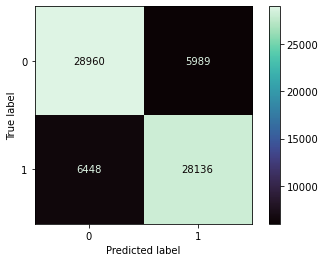

K Nearest Neighbor
------------------


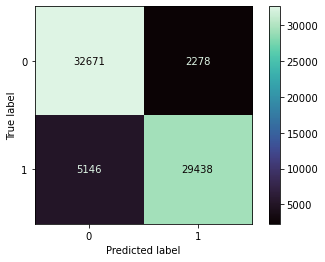

Decision Tree
------------------


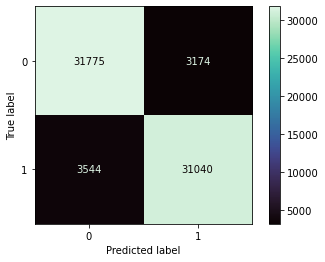

Random Forest
------------------


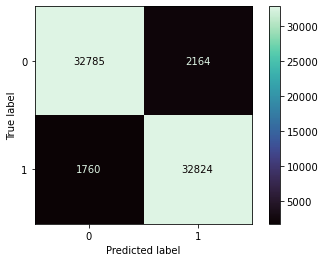

Gradient Boost
------------------


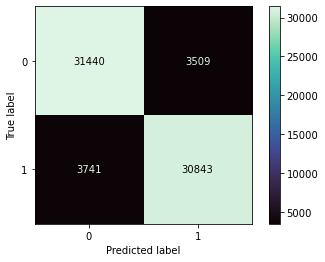

XGBoost
------------------


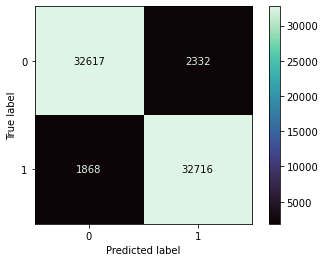

In [78]:
models = {
    "Logistic Regression"    :  LogisticRegression(),
    "K Nearest Neighbor"     :  KNeighborsClassifier(),
    "Decision Tree"          :  DecisionTreeClassifier(),
    "Random Forest"          :  RandomForestClassifier(),
    "Gradient Boost"         :  GradientBoostingClassifier(),
    "XGBoost"                :  xg.XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    #Train model
    model.fit(X_train,y_train)
    
    print(list(models.keys())[i])
    print('-'*18)
    
    #Confusion Matrix
    plot_confusion_matrix(model,X_test,y_test,cmap='mako')
    plt.show()

# AUC-ROC CURVE

Logistic Regression
------------------


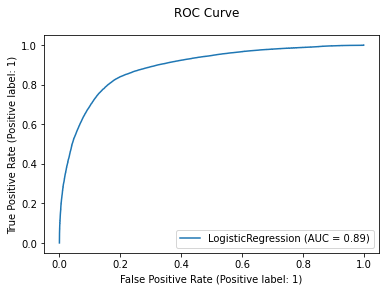

K Nearest Neighbor
------------------


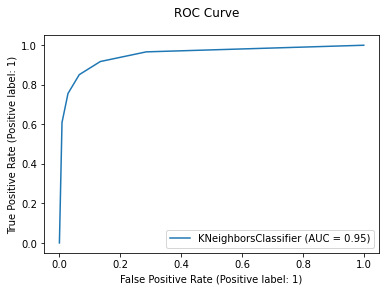

Decision Tree
------------------


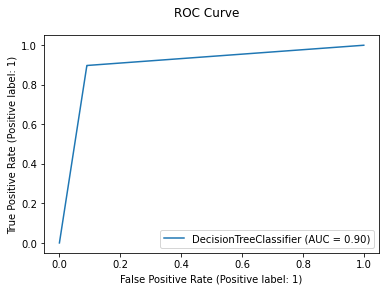

Random Forest
------------------


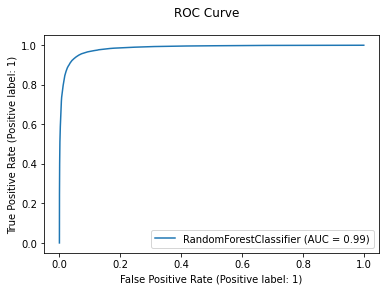

Gradient Boost
------------------


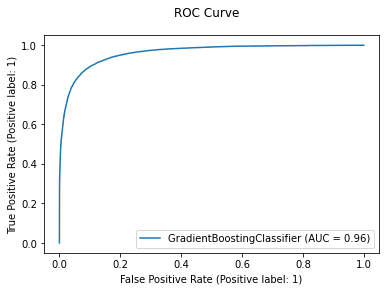

XGBoost
------------------


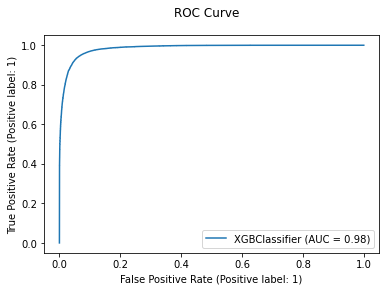

In [77]:
models = {
    "Logistic Regression"    :  LogisticRegression(),
    "K Nearest Neighbor"     :  KNeighborsClassifier(),
    "Decision Tree"          :  DecisionTreeClassifier(),
    "Random Forest"          :  RandomForestClassifier(),
    "Gradient Boost"         :  GradientBoostingClassifier(),
    "XGBoost"                :  xg.XGBClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    #Train model
    model.fit(X_train,y_train)
    
    print(list(models.keys())[i])
    print('-'*18)
    
    #Auc-Roc Curve
    plot = plot_roc_curve(model,X_test,y_test)
    plot.figure_.suptitle('ROC Curve')
    plt.show()

# Saving the best model

In [79]:
import joblib
filename = "Micro_Credit_Loan.pkl"
joblib.dump(model,filename)

['Micro_Credit_Loan.pkl']

I am using the joblib option to save the final classification model but it can be done using pickle too.

# Conclusion

Key Findings and Conclusions of the Study: From the final model MFI can find if a person will return money or not and should a MFI provide a load to that person or not judging from the various features taken into consideration

Learning Outcomes of the Study in respect of Data Science: I built multiple classification models and did not rely on one single model for getting better accuracy and using cross validation comparison I ensured that the model does not fall into overfitting and underfitting issues. I picked the best one and performed hyper parameter tuning on it to enhace the scores.

Limitations of this work and Scope for Future Work: Limitation is it will only work for this particular use case and will need to be modified if tried to be utilized on a different scenario but on a similar scale. Scope is that we can use it in companies to find whether we should provide loan to a person or not and we can also make prediction about a person buying an expensive service on the basis of there personal details that we have in this dataset like number of times data account got recharged in last 30 days and daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) so even a marketing company can also use this.